In [131]:
import numpy as np
import os
import re
import time
import scipy
import glob
import sys
from datetime import datetime
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl

import importlib
import pandas as pd
import scipy.stats as spstats

# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil

import _pickle as pkl

In [132]:
importlib.reload(util)
util.set_sns_style(style='dark')
%matplotlib notebook

In [133]:
root_dir = '/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data'
#experiment = 'Spontaneous_edge_tracking'
experiment = 'hdeltac/csv'
# experiment = 'hdeltac'
# 'hdeltac/csv/20220517_hdc_split_60d05_sytgcamp7f'
src_dir = os.path.join(root_dir, experiment)
# src_dir = '/Users/julianarhee/Documents/rutalab/data/test'
print(src_dir)
fig_id = os.path.join(root_dir.split('/My Drive')[1], experiment)
savedir = '/Users/julianarhee/Documents/rutalab/data/gdrive/{}'.format(experiment)
savedir = savedir.replace(" ", "")
figdir = os.path.join(savedir, 'figures')
print("Saving figures to:{}    {}".format('\n', figdir))
if not os.path.exists(figdir):
    os.makedirs(figdir)

/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data/hdeltac/csv
Saving figures to:
    /Users/julianarhee/Documents/rutalab/data/gdrive/hdeltac/csv/figures


In [134]:
log_files = sorted(glob.glob(os.path.join(src_dir, '2022*', 'et', '*.csv')), \
                   key=util.natsort)
#log_files = sorted(glob.glob(os.path.join(src_dir, '*.log')), key=util.natsort)
print("Found {} raw .log behavior files.".format(len(log_files)))
for fi, fpath in enumerate(log_files):
    dfn = fpath.split('/hdeltac/csv/')[1].split('/et')[0]
    print(fi, dfn)
file_ix = int(input("Select index of file: "))
csv_fpath = log_files[file_ix]
print(csv_fpath)
csv_df = butil.load_dataframe_resampled_csv(csv_fpath)
csv_df = butil.parse_bouts(csv_df)

Found 7 raw .log behavior files.
0 20220517_hdc_split_60d05_sytgcamp7f
1 20220627_hdc_split_Fly1
2 20220627_hdc_split_Fly2
3 20220628_HDC_sytjGCaMP7f_Fly1
4 20220628_HDC_sytjGCaMP7f_Fly1_45-004
5 20220629_HDC_split_sytjGCaMP7f_Fly1
6 20220629_HDC_split_sytjGCaMP7f_Fly3
Select index of file: 0
/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data/hdeltac/csv/20220517_hdc_split_60d05_sytgcamp7f/et/all_info_eb_fb.csv


In [135]:
strip_width = 10
strip_sep=200
csv_df, new_borders = butil.check_entryside_and_flip(csv_df, strip_width=strip_width) #,

In [136]:
#trial_id, csv_df['flipped'].unique()

In [137]:
# Load PKL
csv_parent = os.path.split(src_dir)[0]
pkl_files = sorted(glob.glob(os.path.join(csv_parent, 'pickles', '20*', 'et', '*.p')),
                   key=util.natsort)
print("Found {} .pkl behavior files.".format(len(pkl_files)))
for fi, fpath in enumerate(pkl_files):
    dfn = fpath.split('/hdeltac/')[1].split('/et')[0]
    print(fi, dfn)
file_ix = int(input("Select index of file: "))
pkl_fpath = pkl_files[file_ix]
print(pkl_fpath)
# load
with open(pkl_fpath, 'rb') as f:
    p = pkl.load(f)
pkl_df = p['ft2'].copy()
pkl_df['instrip'] = pkl_df['instrip'].astype(bool)
pkl_df = pkl_df.iloc[1:].reset_index(drop=True)
pkl_df = butil.parse_bouts(pkl_df)
# add trial_id
file_id = [f for f in pkl_fpath.split('/') if re.findall('[0-9]{8}', f)][0]
condition = os.path.split(os.path.split(pkl_fpath)[0])[-1] 
# assumes `et` and `replay` are parents dirs of .csv for hdeltac
print(file_id, condition)
pkl_df['trial_id'] = file_id

Found 7 .pkl behavior files.
0 pickles/20220517_hdc_split_60d05_sytgcamp7f
1 pickles/20220627_hdc_split_Fly1
2 pickles/20220627_hdc_split_Fly2
3 pickles/20220628_HDC_sytjGCaMP7f_Fly1
4 pickles/20220628_HDC_sytjGCaMP7f_Fly1_45-004
5 pickles/20220629_HDC_split_sytjGCaMP7f_Fly1
6 pickles/20220629_HDC_split_sytjGCaMP7f_Fly3
Select index of file: 0
/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data/hdeltac/pickles/20220517_hdc_split_60d05_sytgcamp7f/et/get_all_info_eb_fb.p
20220517_hdc_split_60d05_sytgcamp7f et


In [138]:
# Load raw
raw_logdir = '/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data/jyr/hdeltac/stripgrid/raw/'
raw_log_files = sorted(glob.glob(os.path.join(raw_logdir, '*stripgrid*.log')), key=util.natsort)
for fi, fn in enumerate(raw_log_files):
    print(fi, os.path.split(fn)[-1])
file_ix = int(input("Select index of file: "))
raw_fpath = raw_log_files[file_ix]
print(raw_fpath)
rawdf = butil.load_dataframe(raw_fpath)
rawdf = butil.parse_bouts(rawdf)

0 05172022-113752_hdc_split_60D05_sytjGCaMP7f_Fly1_stripgrid_001.log
1 06272022-115327_HDC_split_60D05_sytjGCaMP7f_Fly1_stripgrid_002.log
2 06272022-145717_HDC_split_60D05_sytjGCaMP7f_Fly2_stripgrid_002.log
3 06282022-134621_HDC_split_60D05_sytjGCaMP7f_Fly1_stripgrid_002.log
4 06292022-103649_HDC_split_60D05_sytjGCaMP7f_Fly1_stripgrid_002.log
5 06292022-164712_HDC_split_60D05_sytjGCaMP7f_Fly3_stripgrid_002.log
Select index of file: 0
/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data/jyr/hdeltac/stripgrid/raw/05172022-113752_hdc_split_60D05_sytjGCaMP7f_Fly1_stripgrid_001.log


In [139]:
trial_id = csv_df['trial_id'].unique()[0]
print(trial_id)

20220517_hdc_split_60d05_sytgcamp7f_et


In [140]:
procdf = rawdf.copy()
procdf = butil.filter_bouts_by_dur(procdf)

In [141]:
strip_width = 10
strip_sep=200
strip_borders, entry_left_edge = butil.find_strip_borders(csv_df, strip_width=strip_width, 
                                        strip_sep=strip_sep, return_entry_sides=True)
_, entry_df = butil.check_entry_left_edge(csv_df, entry_ix=None, return_bool=True,
                                                       only_upwind_outbouts=False)

<IPython.core.display.Javascript object>


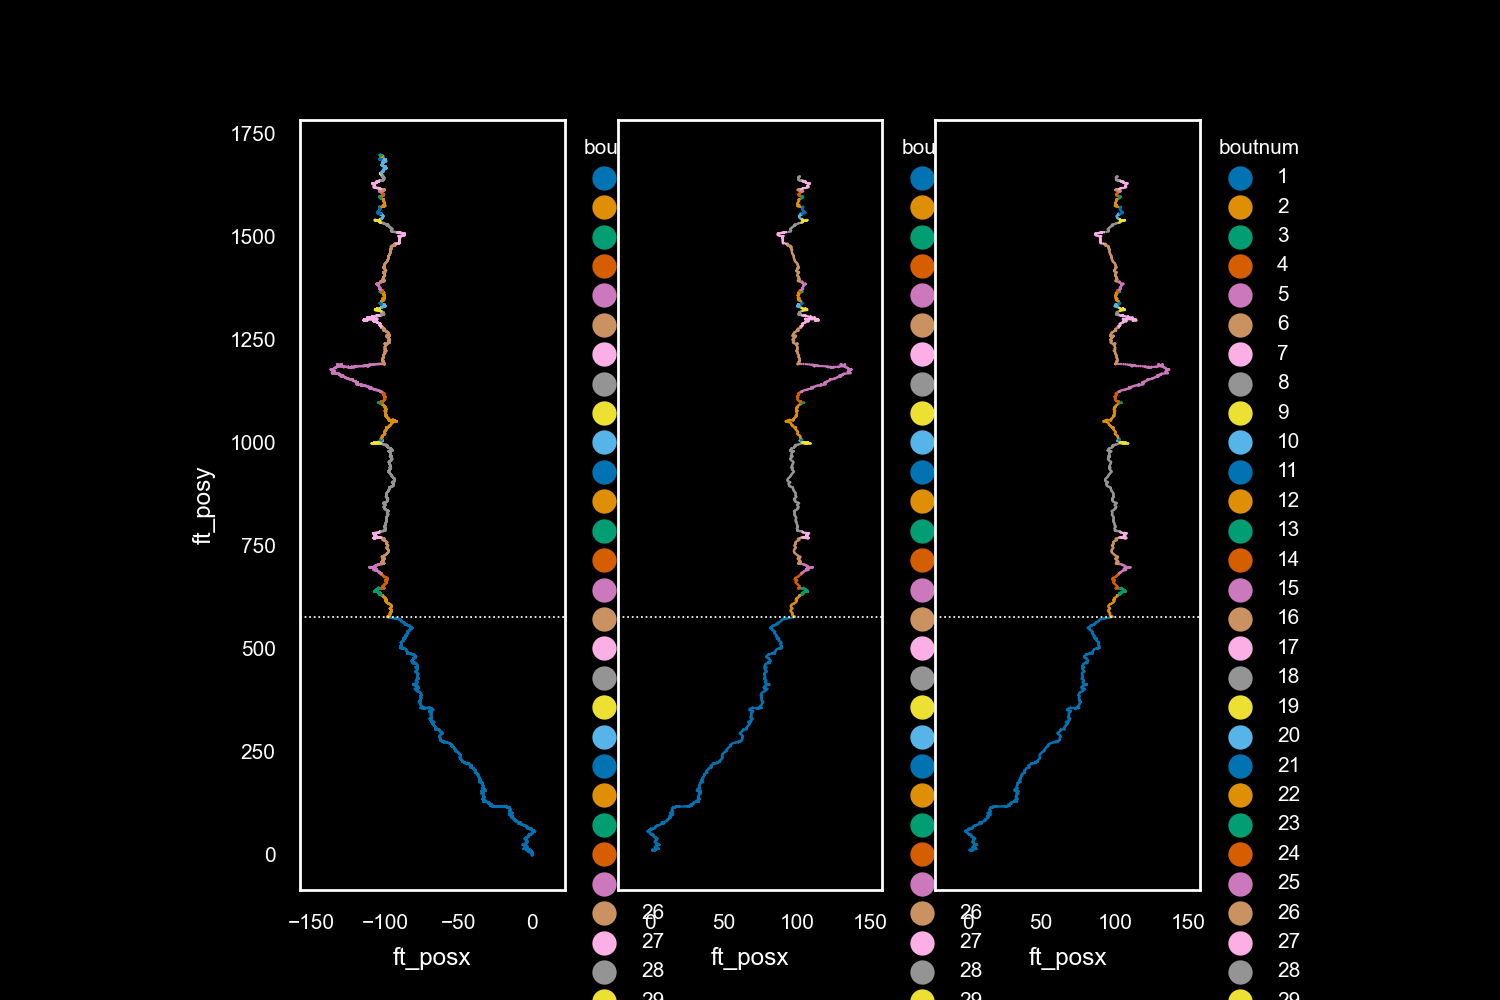

In [142]:
fig, axn = pl.subplots(1,3, sharex=False, sharey=True)
for ax, df_ in zip(axn.flat, [procdf, csv_df, pkl_df]):
    butil.plot_trajectory(df_, ax=ax, hue_varname='boutnum', palette='colorblind')
    #ax.set_xlim([0, 120])

<IPython.core.display.Javascript object>


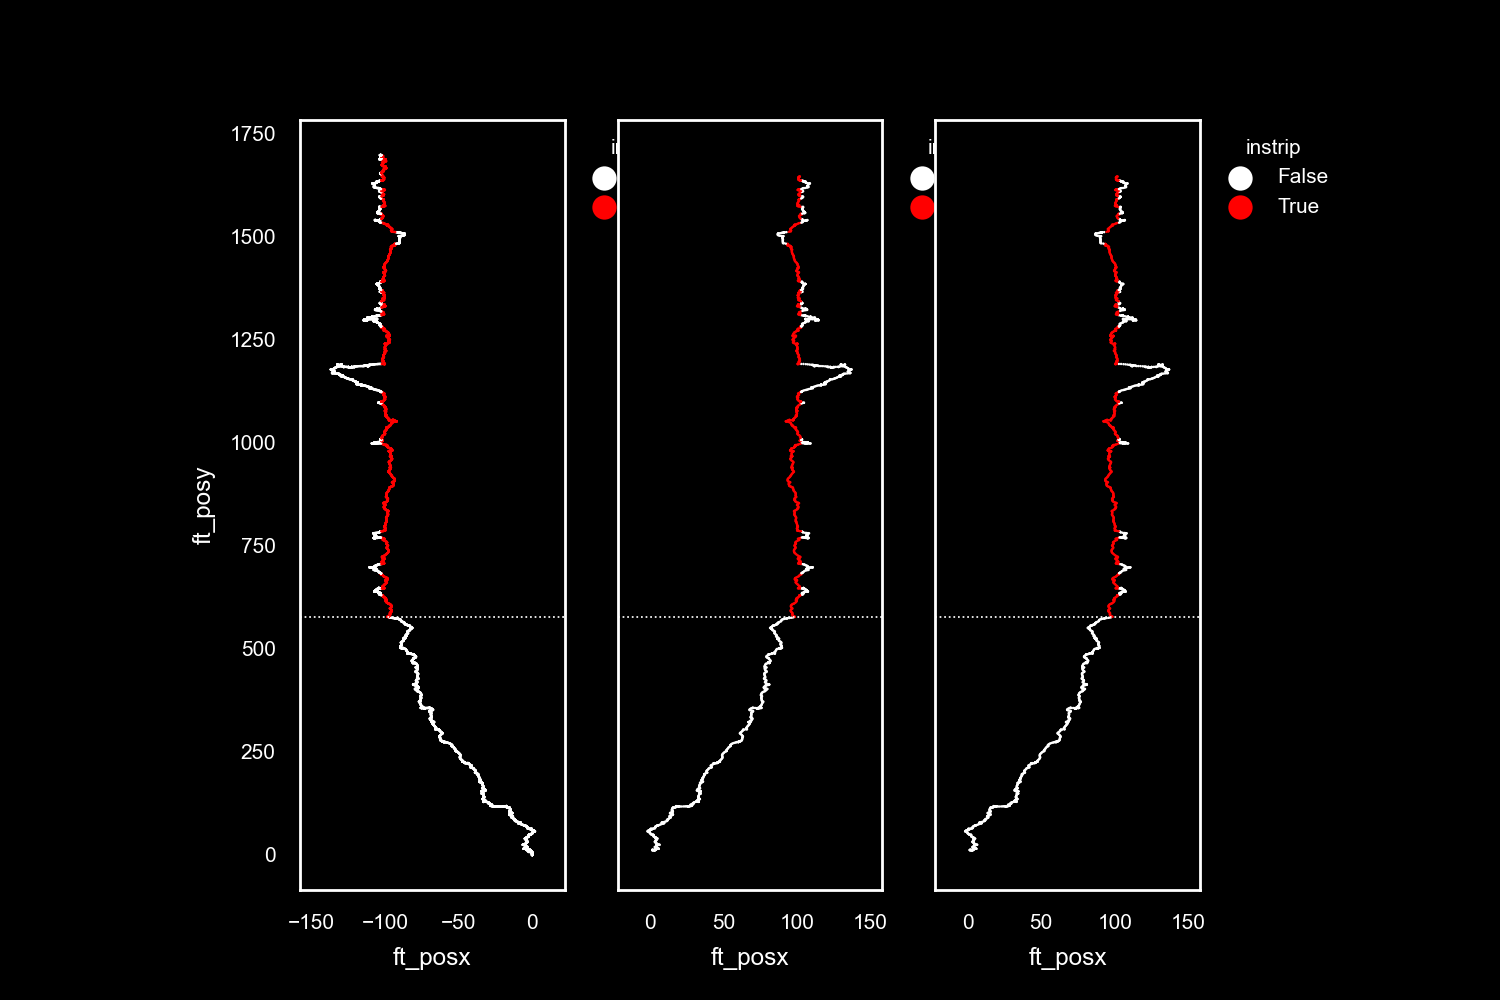

In [143]:
fig, axn = pl.subplots(1,3, sharex=False, sharey=True)
for ax, df_ in zip(axn.flat, [procdf, csv_df, pkl_df]):
    butil.plot_trajectory(df_, ax=ax) #hue_varname='boutnum', palette='colorblind')
    #ax.set_xlim([-50, 50])

In [144]:
cols_to_use = pkl_df.columns.difference(csv_df.columns) # cols in df_ that are not in p_df already
df = pd.merge(csv_df, pkl_df[cols_to_use], left_index=True, right_index=True, how='outer')
print(df.shape) 
df.columns

(3103, 54)


Index(['ft_posx', 'ft_posy', 'time', 'instrip', 'Unnamed: 0', 'x', 'y',
       'seconds', 'heading', 'offset_phase_eb', 'offset_phase_fb_upper',
       'offset_phase_fb_lower', 'fitted_amplitude_eb',
       'fitted_amplitude_fb_upper', 'fitted_amplitude_fb_lower',
       'fitted_baseline_eb', 'fitted_baseline_fb_upper',
       'fitted_baseline_fb_lower', 'wedges_eb', 'wedges_fb_upper',
       'wedges_fb_lower', 'condition', 'fly_id', 'trial_id', 'boutnum',
       'flipped', 'heading_og', 'ang_velocity', 'del_rot_error',
       'delta_timestep', 'df_pitch', 'df_roll', 'df_yaw', 'frame',
       'ft_heading', 'ft_movement_dir', 'ft_speed', 'led1_stpt', 'led2_stpt',
       'mfc1_stpt', 'mfc2_stpt', 'mfc3_stpt', 'motor_heading',
       'motor_step_command', 'net_motion', 'offset_eb_phase',
       'offset_fb_phase_lower', 'offset_fb_phase_upper', 'seconds_x',
       'sequence_counter', 'sig_status', 'timestamp', 'x_velocity',
       'y_velocity'],
      dtype='object')

In [145]:
# check entryside
assert len( df['flipped'].unique())==1, "Too many flips"
is_flipped = df['flipped'].unique()[0]
eb_heading_corr = np.corrcoef(df['offset_phase_eb'], df['heading'])[0, 1] 
print(eb_heading_corr)
if is_flipped and eb_heading_corr < -0.5:
    print("Flipping")
    assert np.corrcoef(df['offset_phase_eb'], pkl_df['ft_heading'])[0, 1] == abs(eb_heading_corr)
#     df_['heading'] = util.unwrap_and_constrain_angles(df_['heading'])*-1 #pkl_df['ft_heading']
#     print(np.corrcoef(df_['offset_phase_eb'], df_['heading'])[0, 1] )
# if np.corrcoef(df_['ft_posx'], pkl_df['ft_posx'])[0, -1]==-1:
#     # also flip df positions
#     xp, yp = util.fliplr_coordinates(df_['ft_posx'].values, df_['ft_posy'].values)
#     df_['ft_posx'] = xp
#     df_['ft_posy'] = yp
    df['offset_phase_eb'] = util.unwrap_and_constrain_angles(df_['offset_phase_eb'])*-1 #pkl_df['ft_heading']
    df['offset_phase_fb_upper'] = util.unwrap_and_constrain_angles(df_['offset_phase_fb_upper'])*-1 #pkl_df['ft_heading']
    df['offset_phase_fb_lower'] = util.unwrap_and_constrain_angles(df_['offset_phase_fb_lower'])*-1 #pkl_df['ft_heading']
    df['offset_phase_eb'] = util.unwrap_and_constrain_angles(df_['offset_phase_eb'])*-1 #pkl_df['ft_heading']
    df['ft_heading'] = util.unwrap_and_constrain_angles(pkl_df['ft_heading'])*-1
    df['ang_velocity'] = df['ang_velocity']*-1

0.7047486128086127


In [146]:
print(np.corrcoef(df['offset_phase_eb'], df['heading'])[0, 1])
print(np.corrcoef(df['offset_phase_eb'], df['ft_heading'])[0, 1])

0.7047486128086127
0.7047486128086127


In [147]:
df1 = df.copy()
df = butil.process_df(df1)

<IPython.core.display.Javascript object>


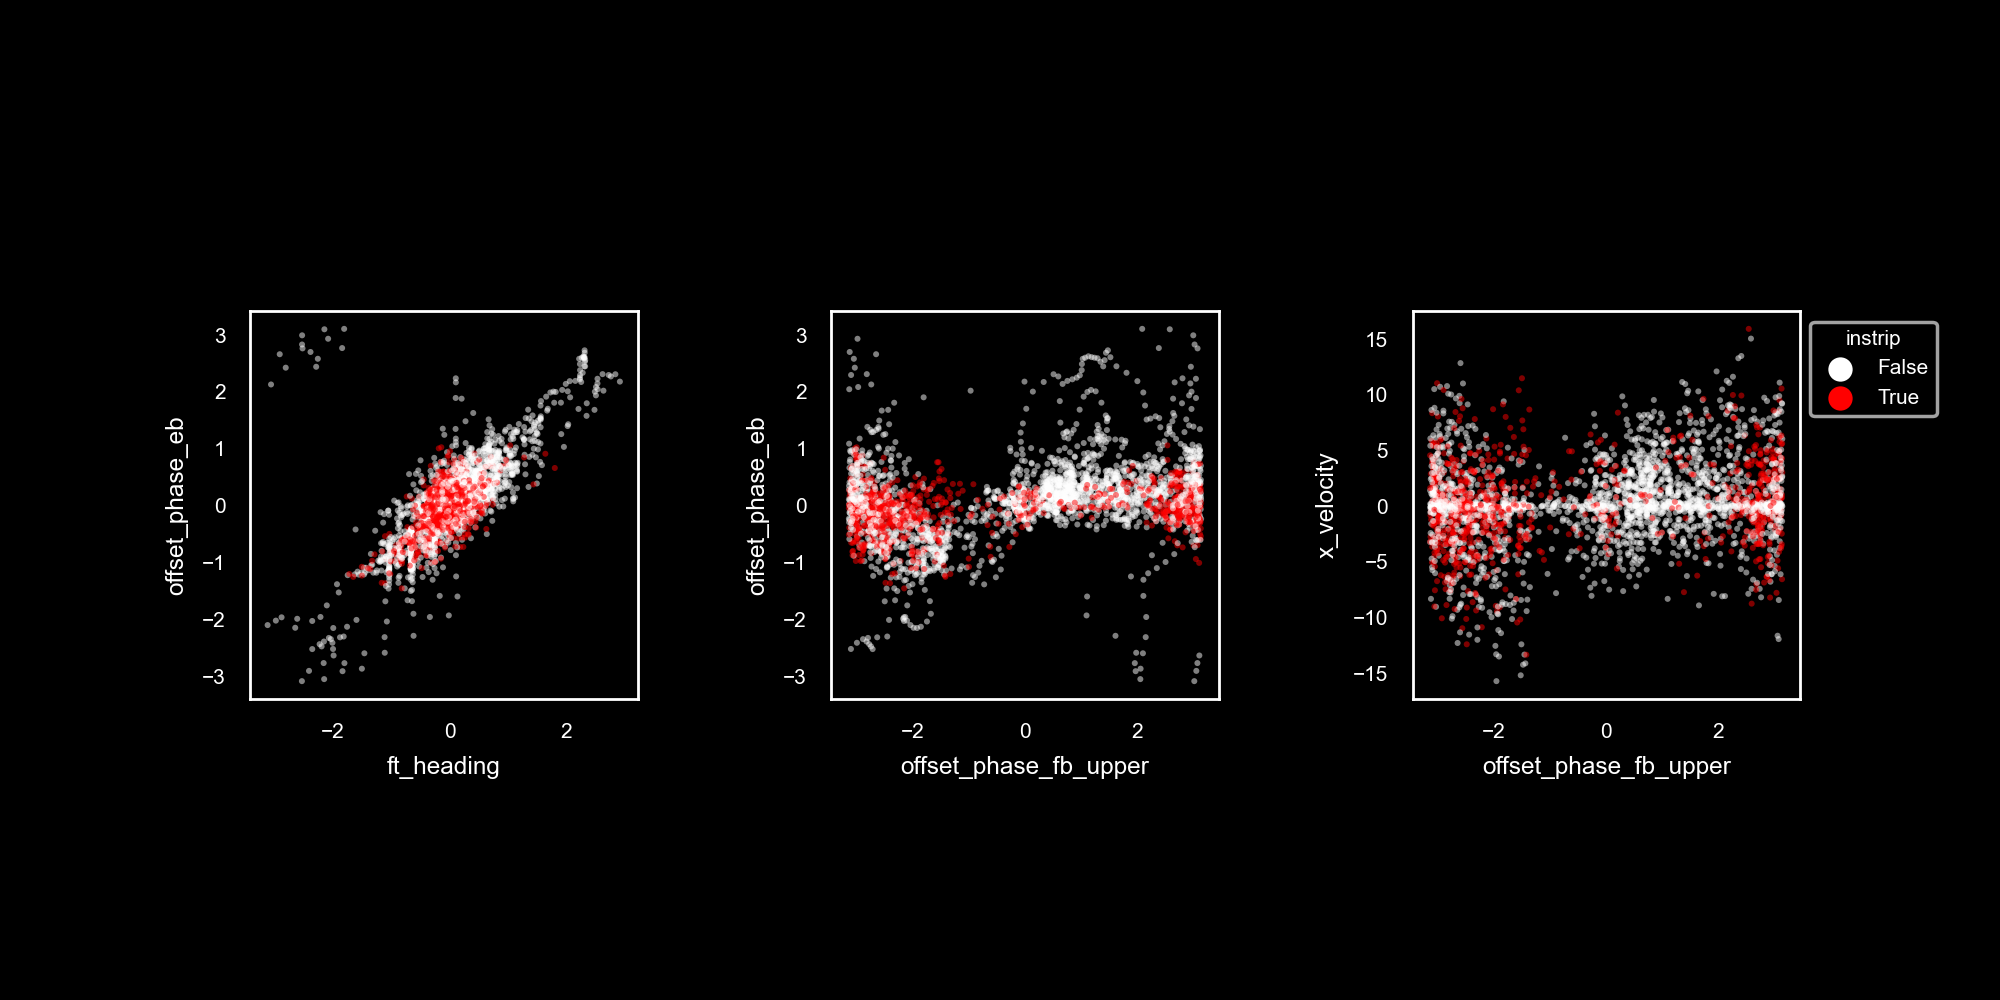

In [126]:
# ----
fig, axn = pl.subplots(1, 3, figsize=(8,4))
ax=axn[0]
v1='ft_heading'; v2='offset_phase_eb'
sns.scatterplot( data=df, ax=ax, x=v1, y=v2, hue='instrip', palette=instrip_palette,
                edgecolor='none', s=3, alpha=0.5)
ax.set_xlabel(v1); ax.set_ylabel(v2)

ax=axn[1]
v1='offset_phase_fb_upper'; v2='offset_phase_eb'
sns.scatterplot( data=df, ax=ax, x=v1, y=v2, hue='instrip', palette=instrip_palette,
                edgecolor='none', s=3, alpha=0.5)
ax.set_xlabel(v1); ax.set_ylabel(v2)

ax=axn[2]
v1='offset_phase_fb_upper'; v2='x_velocity';
sns.scatterplot( data=df, ax=ax, x=v1, y=v2, hue='instrip', palette=instrip_palette,
                edgecolor='none', s=3, alpha=0.5)
ax.set_xlabel(v1); ax.set_ylabel(v2)
# 
for ai, ax in enumerate(axn):
    ax.set_box_aspect(1)
    if ai!=2:
        ax.legend_.remove()
    else:
        ax.legend(bbox_to_anchor=(1,1), loc='upper left', title='instrip')
pl.subplots_adjust(wspace=0.5)

In [105]:
df.columns

Index(['ft_posx', 'ft_posy', 'time', 'instrip', 'Unnamed: 0', 'x', 'y',
       'seconds', 'heading', 'offset_phase_eb', 'offset_phase_fb_upper',
       'offset_phase_fb_lower', 'fitted_amplitude_eb',
       'fitted_amplitude_fb_upper', 'fitted_amplitude_fb_lower',
       'fitted_baseline_eb', 'fitted_baseline_fb_upper',
       'fitted_baseline_fb_lower', 'wedges_eb', 'wedges_fb_upper',
       'wedges_fb_lower', 'condition', 'fly_id', 'trial_id', 'boutnum',
       'flipped', 'heading_og', 'ang_velocity', 'del_rot_error',
       'delta_timestep', 'df_pitch', 'df_roll', 'df_yaw', 'frame',
       'ft_heading', 'ft_movement_dir', 'ft_speed', 'led1_stpt', 'led2_stpt',
       'mfc1_stpt', 'mfc2_stpt', 'mfc3_stpt', 'motor_heading',
       'motor_step_command', 'net_motion', 'offset_eb_phase',
       'offset_fb_phase_lower', 'offset_fb_phase_upper', 'seconds_x',
       'sequence_counter', 'sig_status', 'timestamp', 'x_velocity',
       'y_velocity', 'rel_time', 'cum_time', 'speed', 'upwind_spee

In [110]:
# pairvars = ['heading', 'offset_phase_eb', 'offset_phase_fb_upper', \
#             'offset_phase_fb_lower',  'df_pitch', 'df_roll', 'df_yaw', 
#             'speed', 'upwind_speed', 'crosswind_speed',
#             'ang_velocity', 'x_velocity', 'y_velocity']
# instrip_palette={True: 'r', False: 'w'}

# g = sns.pairplot(df, vars=pairvars, hue='instrip', palette=instrip_palette,
#              diag_kind='hist',
#              plot_kws={'edgecolor': 'none', 's': 5, 'alpha': 0.5},
#              diag_kws={'common_norm': False, 'kde':True, 'stat':'probability'})
# pl.savefig(os.path.join(figdir, 'pairvars.png'))


## add RDP

In [149]:
rdp_epsilon=1
xvar='ft_posx'
yvar = 'ft_posy'
df = butil.add_rdp_by_bout(df, epsilon=rdp_epsilon, xvar=xvar, yvar=yvar)

In [151]:
heading_vars = [c for c in df.columns if 'phase' in c or 'heading' in c]
for c in heading_vars:
    print("{} - max/min: {:.2f}, {:.2f}".format(c, df[c].min(), df[c].max()))

heading - max/min: -3.13, 2.93
offset_phase_eb - max/min: -3.08, 3.11
offset_phase_fb_upper - max/min: -3.14, 3.14
offset_phase_fb_lower - max/min: -3.14, 3.14
heading_og - max/min: -3.13, 2.93
ft_heading - max/min: -3.13, 2.93
motor_heading - max/min: -2.67, 2.36
offset_eb_phase - max/min: -3.08, 3.11
offset_fb_phase_lower - max/min: -3.14, 3.14
offset_fb_phase_upper - max/min: -3.14, 3.14


## single bout metrics

In [153]:
metrics = df.groupby('boutnum')\
            .apply(butil.calculate_bout_metrics, heading_vars=heading_vars).unstack().reset_index()
metrics.head()
sorted_by_dist = metrics.sort_values(by='duration', ascending=False)['boutnum'].unique()
sorted_by_dist

array([ 1, 15,  8, 17, 16, 12, 26,  9,  3, 19,  7,  6,  2,  5, 27, 37, 14,
       25,  4, 29, 22, 31, 28, 32, 38, 34, 20, 33, 30, 18, 21, 11, 36, 24,
       13, 35, 10, 23])

In [154]:
long_bout_dur=2
long_bouts = metrics[metrics['duration']>long_bout_dur]['boutnum'].unique()
len(long_bouts)

24

<IPython.core.display.Javascript object>


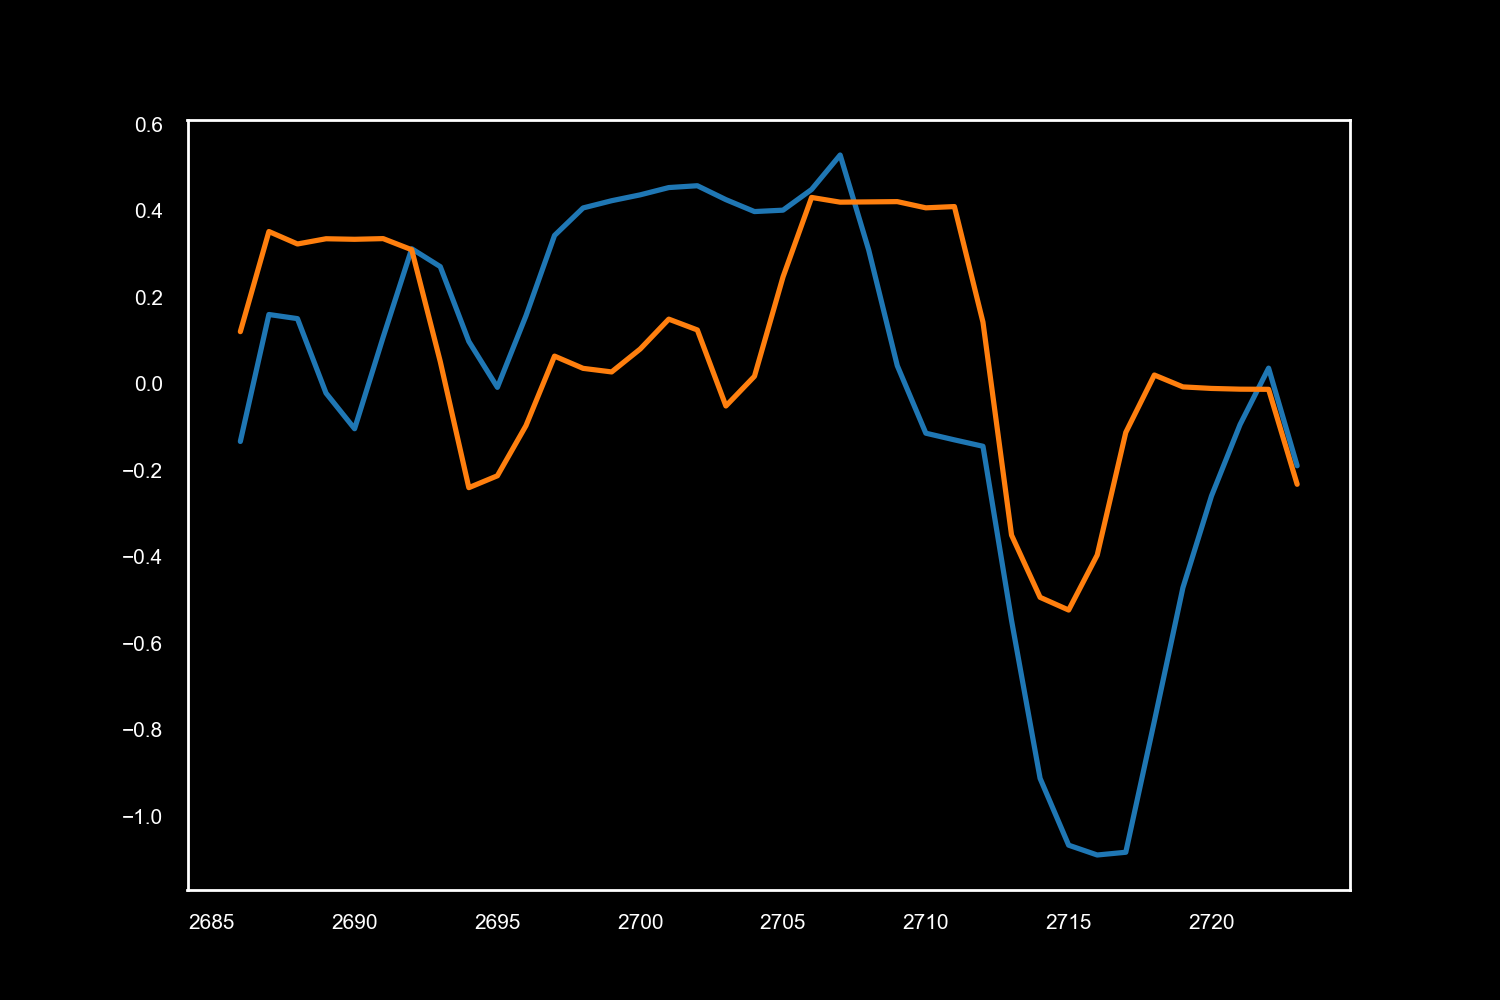

In [159]:
bnum = 25
b_ = df[df['boutnum']==bnum].copy()

fig, ax = pl.subplots()
# sns.scatterplot(data=df, x='offset_phase_eb', y='ft_heading', edgecolor='none', 
#                s=5, ax=ax, hue='boutnum', palette='colorblind')
ax.plot(b_['offset_phase_eb'])
ax.plot(b_['ft_heading'])


In [224]:
def cov_value(x,y):

	mean_x = sum(x) / float(len(x))
	mean_y = sum(y) / float(len(y))

	sub_x = [i - mean_x for i in x]
	sub_y = [i - mean_y for i in y]

	sum_value = sum([sub_y[i]*sub_x[i] for i in range(len(x))])
	denom = float(len(x)-1)

	cov = sum_value/denom
	return cov

def RMS(x, y):
    n=len(x)
    return np.sqrt(np.sum((x-y)**2)/n)
    
def similarity(x, y):
    return 1/RMS(x, y)
    

In [225]:
metrics['eb_heading_corr'] = df.groupby('boutnum').apply(lambda x: np.corrcoef(x['offset_phase_eb'], x['ft_heading'])[0, -1])

In [228]:
metrics['eb_heading_sim'] = df.groupby('boutnum').apply(lambda x: \
                                        similarity(x['offset_phase_eb'], x['ft_heading']))

<IPython.core.display.Javascript object>


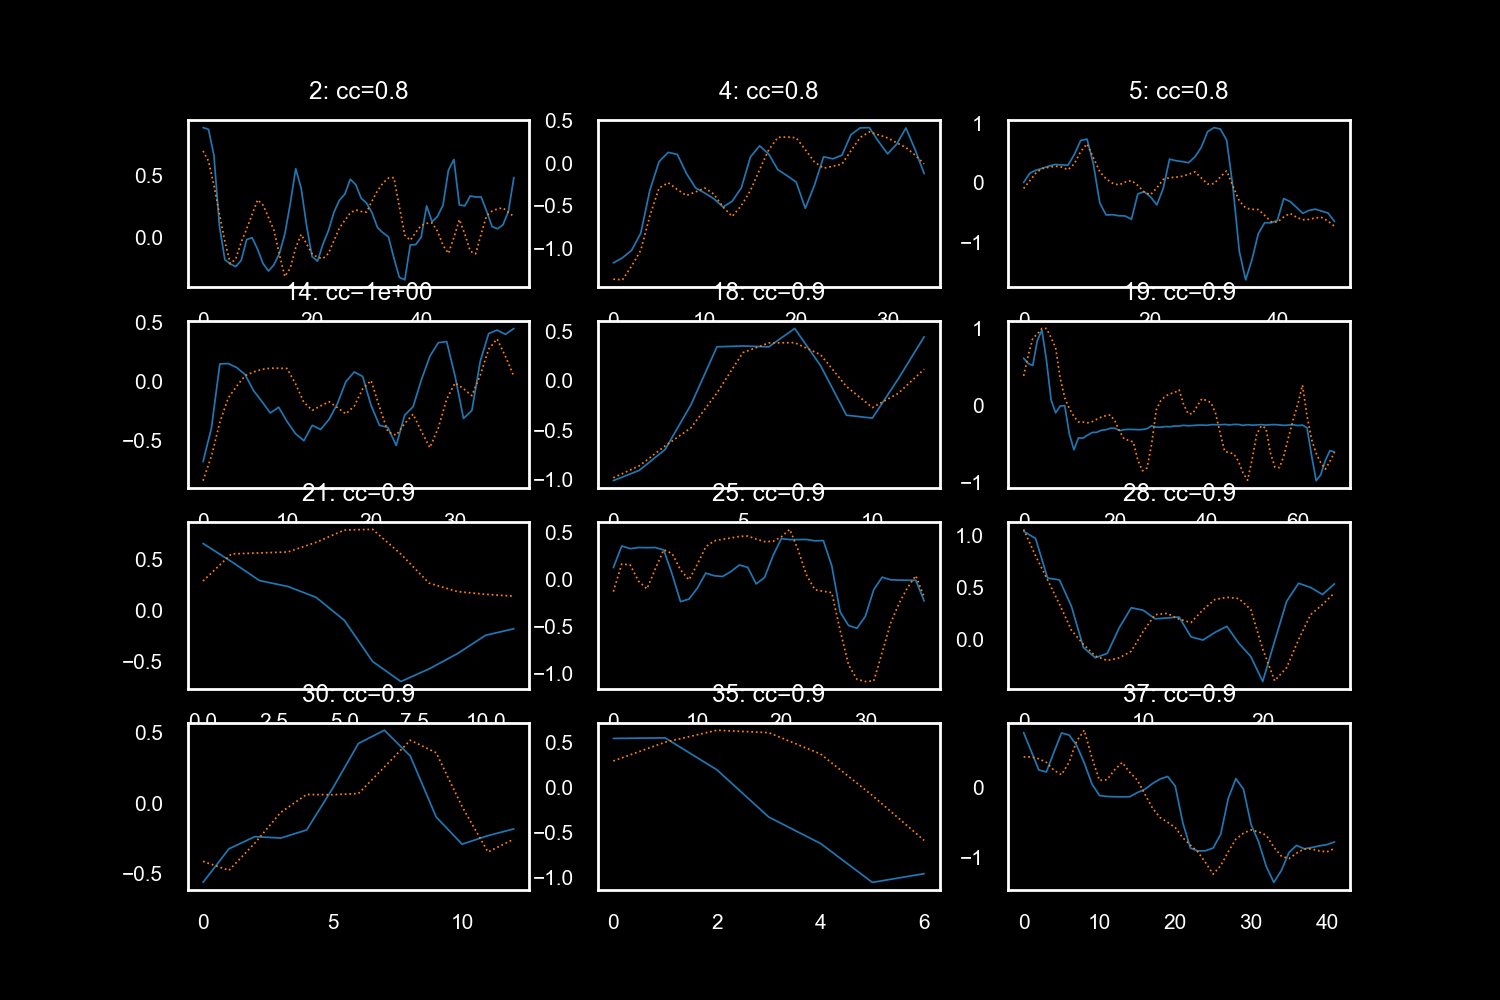

In [213]:

m_ = metrics[metrics['eb_heading_corr']>0.75]
fig, axn = pl.subplots(4, 3)
#colors = sns.color_palette('colorblind', n_colors=len(m_['boutnum'].unique()))
for ax, (bnum, b_) in zip(axn.flat, df[df['boutnum'].isin(m_['boutnum'])].groupby('boutnum')):
    ax.plot(np.arange(0, len(b_)), b_['ft_heading'], lw=0.5)
    ax.plot(np.arange(0, len(b_)), b_['offset_phase_eb'], linestyle=':', lw=0.5)
    cc=float(metrics[metrics['boutnum']==bnum]['eb_heading_corr'])
    ax.set_title("{}: cc={:.1}".format(bnum, cc))

In [245]:
metrics['eb_heading_diff'] = df.groupby('boutnum').apply(lambda x: abs(x['offset_phase_eb']-x['ft_heading']).max())

In [246]:
np.rad2deg(metrics['eb_heading_diff'])


0            NaN
1      66.338004
2      38.636016
3      46.189953
4      39.217795
5      68.570276
6      48.174280
7     319.721171
8      34.523396
9     297.822591
10     51.407041
11     84.230335
12     65.673812
13     28.214313
14     44.225105
15    316.714366
16     68.345000
17     53.926853
18     26.721152
19     48.573194
20     41.644355
21     74.243008
22     34.223724
23     15.358551
24     24.612824
25     55.634322
26     47.388876
27     48.417925
28     36.659964
29     46.353913
30     26.144785
31     53.533009
32     59.664077
33     35.265615
34     17.517935
35     57.038074
36     48.029550
37     49.598193
Name: eb_heading_diff, dtype: float64

In [221]:
b_ = df[df['boutnum']==35]
cov_value(b_['offset_phase_eb'], b_['ft_heading'])


0.20082723865587812

In [233]:
metrics[['boutnum', 'eb_heading_corr', 'eb_heading_sim']].sort_values(by='eb_heading_sim', ascending=False)

boutnum  eb_heading_corr  eb_heading_sim
34       35         0.907082        6.391434
23       24         0.023374        5.797909
18       19         0.923703        4.907367
30       31         0.723868        4.462851
24       25         0.901134        4.267736
8         9         0.621463        3.880407
4         5         0.840199        3.825980
22       23         0.472038        3.714844
28       29         0.642296        3.534005
20       21         0.924002        3.447163
3         4         0.820493        3.318624
14       15         0.430018        3.311023
2         3         0.294074        3.303695
26       27         0.359635        3.216897
1         2         0.799995        3.036716
13       14         0.975300        2.991156
19       20         0.717609        2.933429
6         7         0.487611        2.915974
27       28         0.897644        2.884140
29       30         0.931267        2.826249
37       38         0.814926        2.716024
33       34         0.638915        2.679534
25       26         0.595290        2.616815
17       18         0.907052        2.543885
32       33         0.598916        2.539658
5         6         0.702653        2.416896
31       32         0.586976        2.388303
12       13         0.616190        2.347390
16       17         0.605612        2.329420
36       37         0.916901        2.302069
10       11        -0.305458        1.759165
35       36         0.666941        1.478664
21       22         0.095743        1.415625
11       12         0.171024        1.333962
15       16         0.708949        1.293365
9        10         0.174288        0.870776
7         8         0.379501        0.710747
0         1              NaN             NaN

<IPython.core.display.Javascript object>


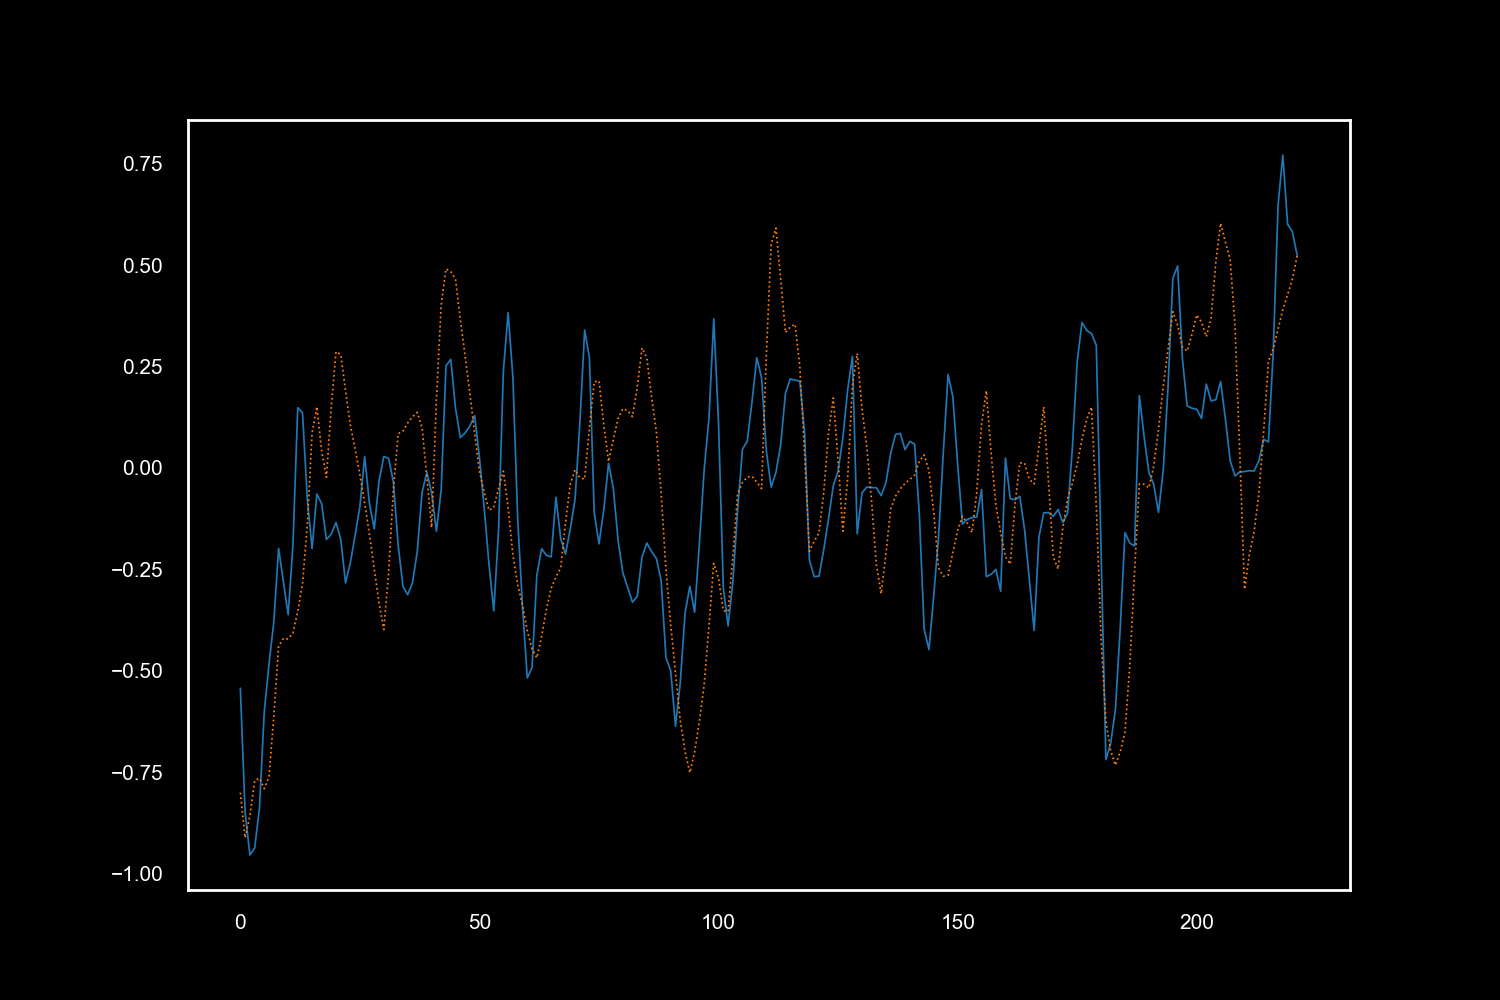

In [237]:
    b_ = df[df['boutnum']==8]

    fig, ax= pl.subplots()
    ax.plot(np.arange(0, len(b_)), b_['ft_heading'], lw=0.5)
    ax.plot(np.arange(0, len(b_)), b_['offset_phase_eb'], linestyle=':', lw=0.5)

In [176]:
df[df['boutnum'].isin(m_['boutnum'])]

ft_posx      ft_posy          time  instrip  Unnamed: 0  \
1099   97.986701   577.037925  41990.909302     True        1100   
1100   98.439078   577.494394  41991.008137     True        1101   
1101   98.388285   577.788135  41991.106346     True        1102   
1102   97.759991   578.234564  41991.205388     True        1103   
1103   97.423141   579.178481  41991.304798     True        1104   
...          ...          ...           ...      ...         ...   
3098  100.917498  1643.194523  42190.811666     True        3099   
3099  101.173578  1644.158126  42190.909485     True        3100   
3100  101.425940  1644.396933  42191.009342     True        3101   
3101  101.876499  1644.614961  42191.106038     True        3102   
3102  101.858257  1644.841182  42191.204617     True        3103   

                       x            y       seconds   heading  \
1099    97.9867011181782   577.037925  41990.909302  0.888237   
1100    98.4390780188064   577.494394  41991.008137  0.874216   
1101     98.388285044208   577.788135  41991.106346  0.662386   
1102    97.7599907669058   578.234564  41991.205388  0.093245   
1103    97.4231413755402   579.178481  41991.304798 -0.180679   
...                  ...          ...           ...       ...   
3098  100.91749757197019  1643.194523  42190.811666 -0.043689   
3099     101.17357775682  1644.158126  42190.909485  0.087836   
3100  101.42594005362601  1644.396933  42191.009342  0.270373   
3101   101.8764986946168  1644.614961  42191.106038  0.570471   
3102   101.8582568687982  1644.841182  42191.204617  0.551959   

      offset_phase_eb  ...      speed  upwind_speed  crosswind_speed  \
1099         0.699402  ...   7.198551      5.651111         4.459157   
1100         0.618089  ...   4.318493      3.807328         2.038046   
1101         0.421440  ...   5.092470      3.752425        -3.442755   
1102         0.188771  ...   8.528492      7.005931        -4.863344   
1103        -0.032782  ...  10.057548      9.660125        -2.799334   
...               ...  ...        ...           ...              ...   
3098        -0.146637  ...  12.307758     12.178812         1.776919   
3099        -0.038815  ...   6.604188      6.082730         2.572099   
3100         0.156291  ...   4.265161      2.324236         3.576245   
3101         0.337338  ...   3.174409      2.274990         2.213886   
3102         0.486050  ...   2.302261      2.294812        -0.185047   

      euclid_dist  upwind_dist  crosswind_dist  bout_type  rdp_ft_posx  \
1099     0.784310     0.657914        0.426955    instrip         True   
1100     0.642657     0.456468        0.452377    instrip        False   
1101     0.298100     0.293741        0.050793    instrip        False   
1102     0.770748     0.446429        0.628294    instrip        False   
1103     1.002221     0.943917        0.336849    instrip        False   
...           ...          ...             ...        ...          ...   
3098     1.532811     1.529030        0.107601    instrip        False   
3099     0.997049     0.963603        0.256080    instrip        False   
3100     0.347442     0.238807        0.252362    instrip        False   
3101     0.500539     0.218028        0.450559    instrip        False   
3102     0.226955     0.226221        0.018242    instrip         True   

     rdp_ft_posy frame_in_bout  
1099        True            58  
1100       False            58  
1101       False            58  
1102       False            58  
1103       False            58  
...          ...           ...  
3098       False            17  
3099       False            17  
3100       False            17  
3101       False            17  
3102        True            17  

[419 rows x 66 columns]

#### figdir for current animal

In [48]:
if not os.path.exists(os.path.join(figdir, trial_id)):
    os.makedirs(os.path.join(figdir, trial_id))

In [49]:
strip_borders

[(92.9867011181782, 102.9867011181782)]

<IPython.core.display.Javascript object>


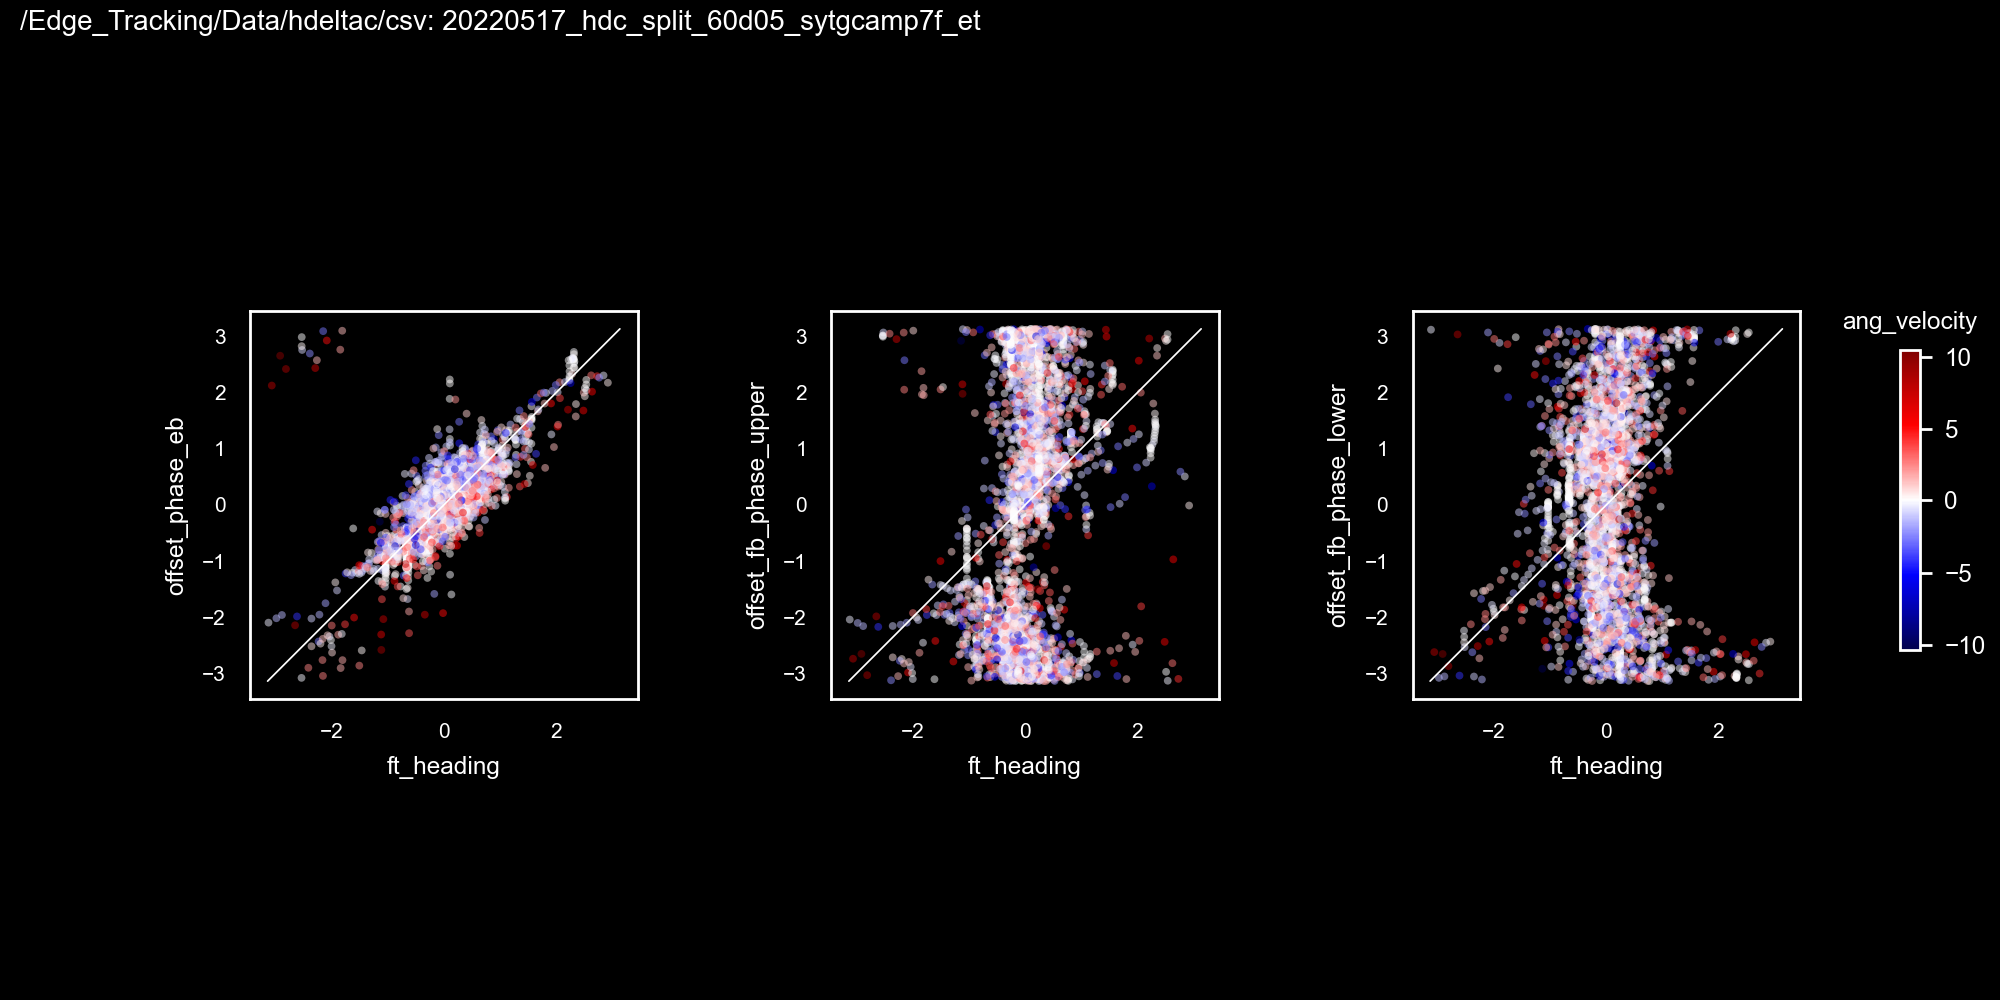

/Users/julianarhee/Documents/rutalab/data/gdrive/hdeltac/csv/figures 20220517_hdc_split_60d05_sytgcamp7f_et


In [50]:
hue_var = 'ang_velocity'
#cmap='viridis' if hue_var=='angvel' else 'seismic'
vcenter = 0
vmin, vmax = df[hue_var].min(), df[hue_var].max()
angvel_norm = mpl.colors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)
angvel_cmap = pl.cm.viridis if hue_var=='angvel' else pl.cm.seismic

hue_norm = mpl.colors.Normalize(vmin=df[hue_var].min(), vmax=df[hue_var].max())
angle_vars = ['offset_phase_eb', 'offset_fb_phase_upper', 'offset_fb_phase_lower']
fig, axn = pl.subplots(1, 3, figsize=(8,4), sharex=True, sharey=False)
for ax, varname in zip(axn.flat, angle_vars):
    sns.scatterplot(data=df, x='ft_heading', y=varname, ax=ax, 
                    hue=hue_var, hue_norm=angvel_norm, palette=angvel_cmap,
                    edgecolor='none', s=5, legend=0, alpha=0.5)
    ax.set_aspect('equal')
    ax.set_ylabel(varname)
    ax.plot([-np.pi, np.pi], [-np.pi, np.pi], lw=0.5, color='w')
util.colorbar_from_mappable(ax, angvel_norm, angvel_cmap, hue_title=hue_var,
    axes=[0.95, 0.35, 0.01, 0.3])

pl.subplots_adjust(wspace=0.5, right=0.9)
util.label_figure(fig, '{}: {}'.format(fig_id, trial_id))
pl.savefig(os.path.join(figdir, '{}_angles.png'.format(trial_id)))
print(figdir, trial_id)

<IPython.core.display.Javascript object>


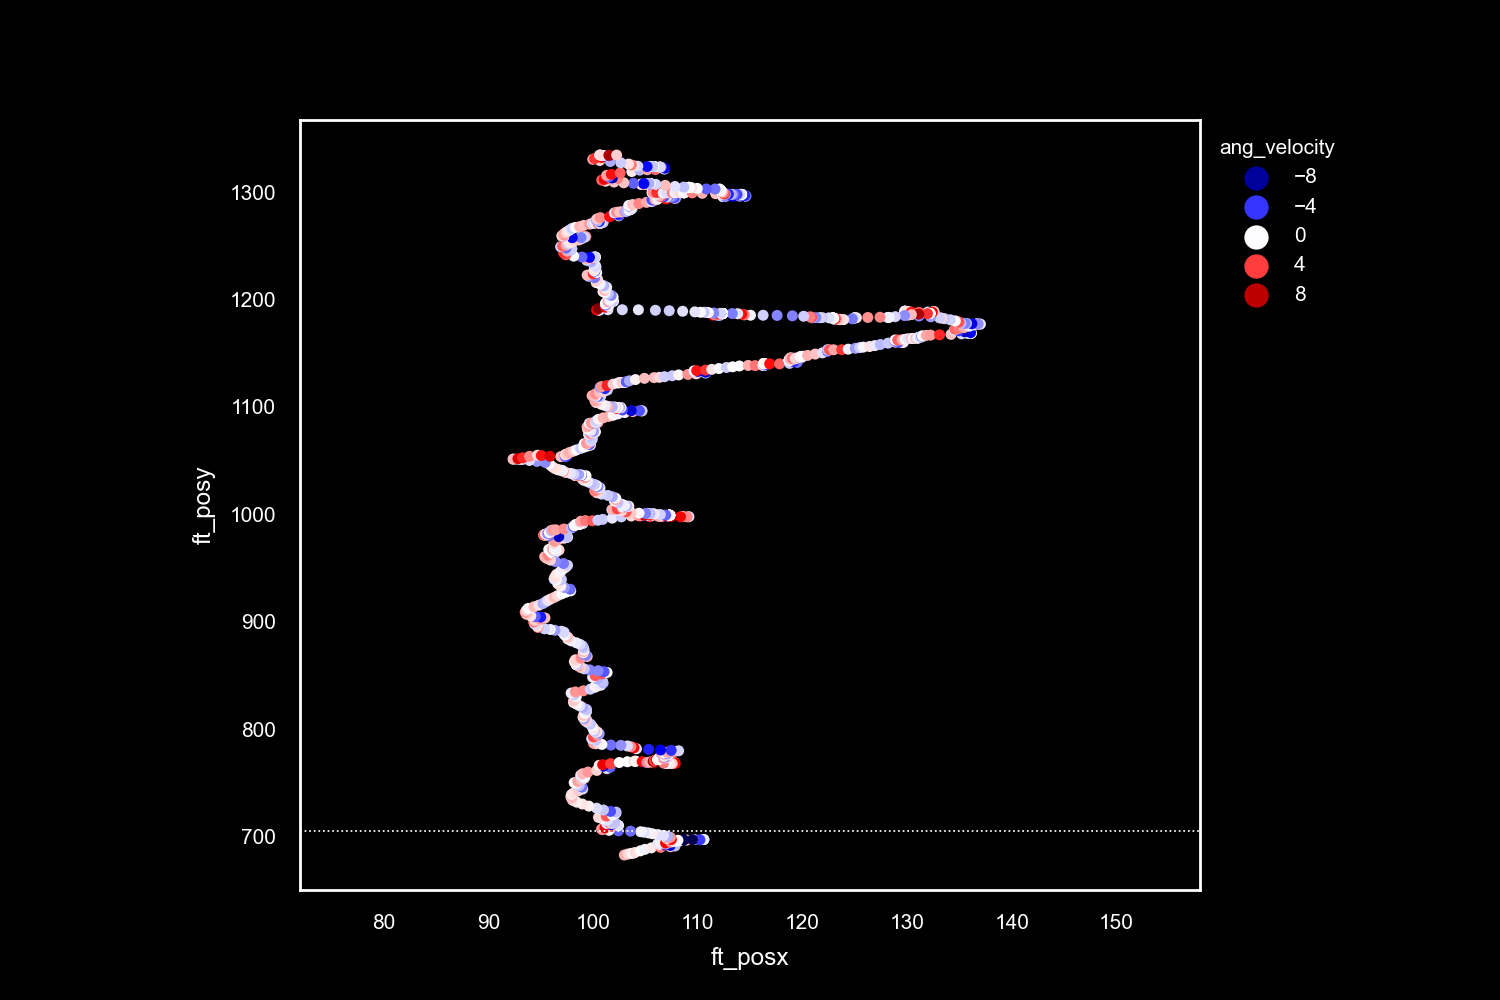

<AxesSubplot: xlabel='ft_posx', ylabel='ft_posy'>

In [51]:
boutnums = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
#theta_norm = mpl.colors.Normalize(vmin=-np.pi, vmax=np.pi)
b_ = df[df['boutnum'].isin(boutnums)].copy()
fig, ax = pl.subplots()
butil.plot_trajectory(b_, ax=ax, hue_varname='ang_velocity', 
                      palette=angvel_cmap, hue_norm=angvel_norm,
                      markersize=10)

In [53]:

heading_colors = dict({
    'offset_phase_eb': 'cyan',
    'offset_phase_fb_upper': 'magenta',
    'offset_phase_fb_lower': 'red',
    'heading': 'y',
    'ft_heading': 'y'
})
heading_scales = dict({
    'offset_phase_eb': 'fitted_amplitude_eb',
    'offset_phase_fb_upper': 'fitted_amplitude_fb_upper',
    'offset_phase_fb_lower': 'fitted_amplitude_fb_lower',
    'heading': 1,
    'ft_heading': 1
})

<IPython.core.display.Javascript object>


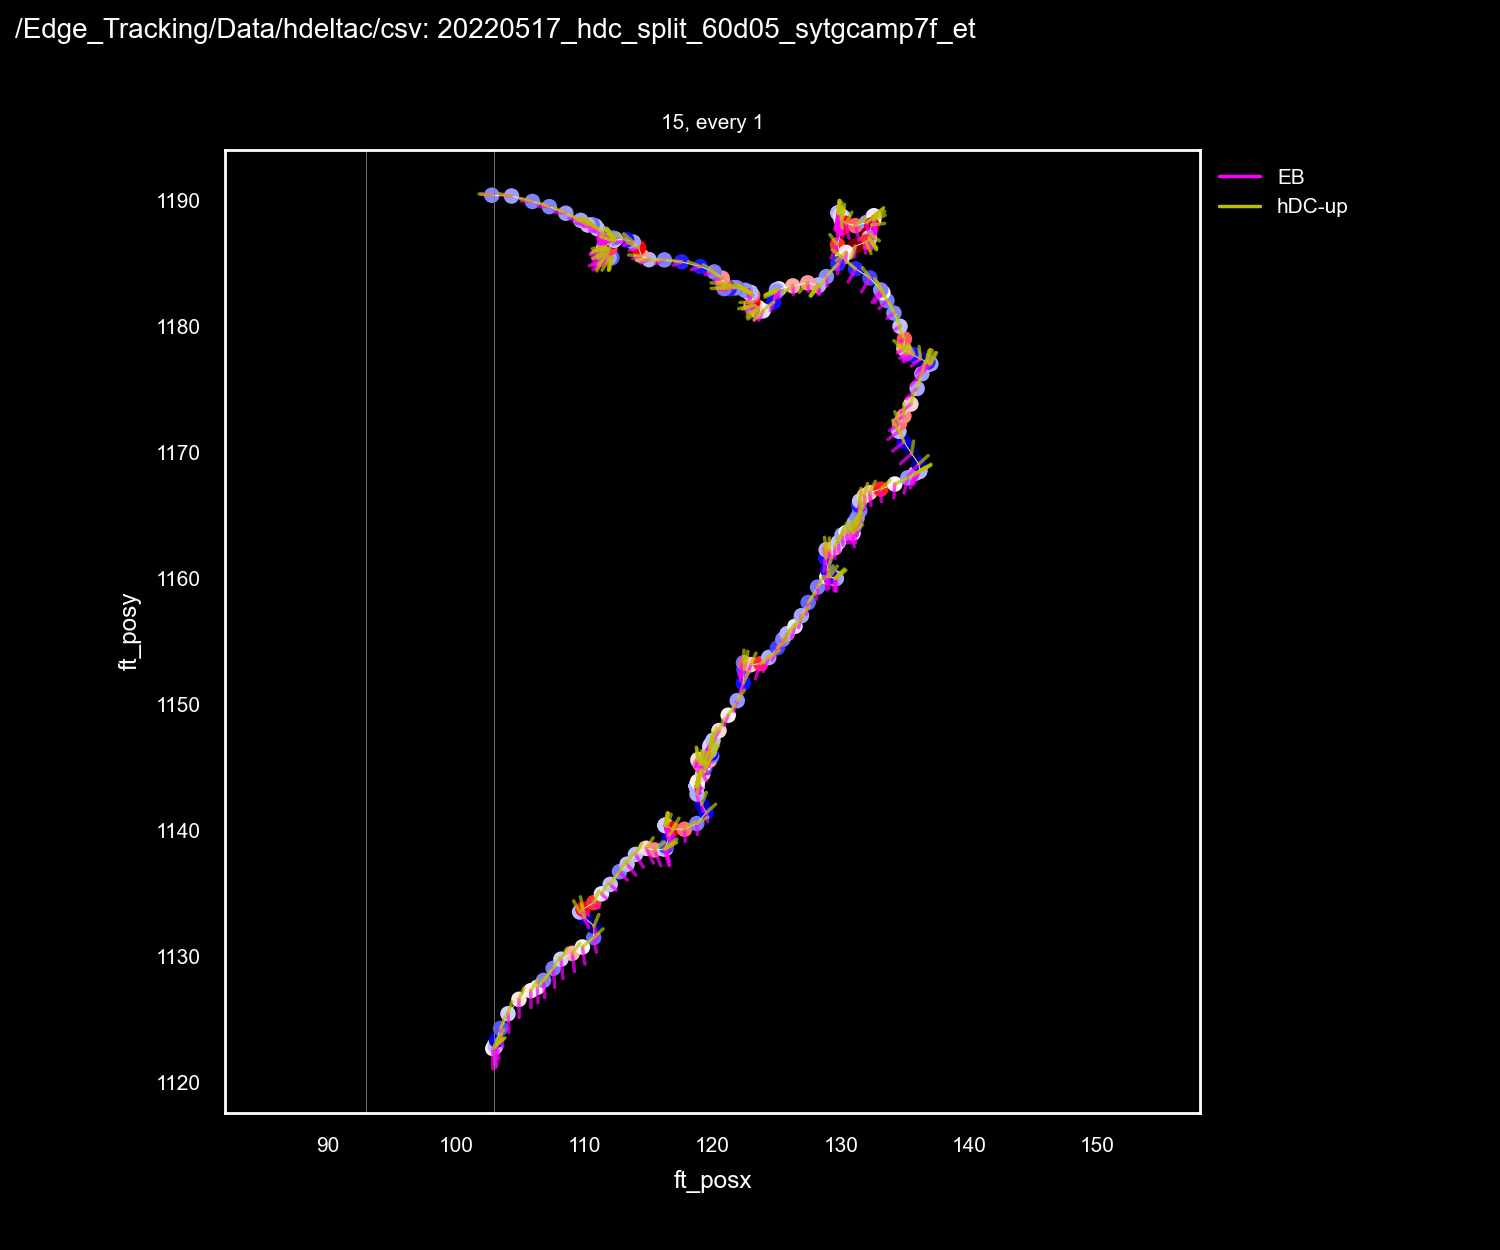

In [54]:
nth = 2
c1 = 'cyan'
c2 = 'magenta'
c3 = 'yellow'
alpha=0.6

varnames = ['offset_phase_fb_upper', 'ft_heading']
colors=[heading_colors[v] for v in varnames]
scales=[heading_scales[v] for v in varnames]
#scales=['fitted_amplitude_eb', 'fitted_amplitude_fb_upper', 0.5]
labels=['EB', 'hDC-up', 'ft_heading']

bnum=15
currbout = df[df['boutnum']==bnum]
nth = int(np.floor( currbout.shape[0] / 200))
fig, ax = pl.subplots(figsize=(6, 5))
ax = butil.overlay_angles_on_path(ax, currbout,nth=nth,
                varnames=varnames, colors=colors, scales=scales)

butil.plot_trajectory(currbout, ax=ax, hue_varname='ang_velocity', alpha=1,
                      palette=angvel_cmap, hue_norm=angvel_norm, markersize=20)

# strip borders
for v in strip_borders[0]:
    ax.axvline(x=v, linestyle='-', lw=0.25, color='gray')
ax.set_title('{}, every {}'.format(bnum, nth), fontsize=6)
# legends
legh = putil.custom_legend(labels, colors, use_line=True, lw=1)
ax.legend(handles=legh, bbox_to_anchor=(1,1), loc='upper left', frameon=False)
# adjust, label, save
pl.subplots_adjust(right=0.8, wspace=0.5, left=0.15)
util.label_figure(fig, '{}: {}'.format(fig_id, trial_id))

In [55]:
bnum = 15
b_ = df[df['boutnum']==bnum].copy()

npoints=len(b_)
varname = 'ft_heading'
pt = varname #$'eb' if varname =='offset_phase_eb' else 'fb'

#angbetween = util.signed_angle_from_target(b_, target_angle=-np.pi, varname=varname)
vals = b_[varname].copy().values
# 
#flip_discontinous_quadrant = np.where(b_[varname]>np.pi/2)[0]
#flipped_vals = -np.pi - (np.pi-vals[flip_discontinous_quadrant])
#vals[flip_discontinous_quadrant] = flipped_vals


In [60]:
heading_vars = ['heading', 'ft_heading', 'offset_phase_eb', 'offset_phase_fb_upper', 'offset_phase_fb_lower']

split_upper_lower = True
for varname in heading_vars:
    #angbetween = util.signed_angle_from_target(b_, target_angle=-np.pi, varname=varname)
    vals = df[varname].copy().values
    # 
    flip_discontinous_quadrant = np.where(df[varname]>np.pi/2)[0]
    flipped_vals = -np.pi - (np.pi-vals[flip_discontinous_quadrant])
    vals[flip_discontinous_quadrant] = flipped_vals
    angbetween = (-np.pi/2 - vals ) #% np.pi/2
    if split_upper_lower:
        df['{}_to_edge'.format(varname)] = angbetween # (angbetween + 2*np.pi) % (2*np.pi)
        vmin=-np.pi; vmax=np.pi; vcenter=0;
    else:
        df['{}_to_edge'.format(varname)] = (angbetween + 2*np.pi) % (2*np.pi)
        vmin=0; vmax=2*np.pi; vcenter=np.pi
    df['{}_to_edge_deg'.format(varname)] = np.rad2deg(angbetween)

In [62]:
bnum = 15
b_ = df[df['boutnum']==bnum].copy()


In [63]:
angbetween.min(), angbetween.max()

(-3.140901604795574, 3.1410401568409814)

<IPython.core.display.Javascript object>


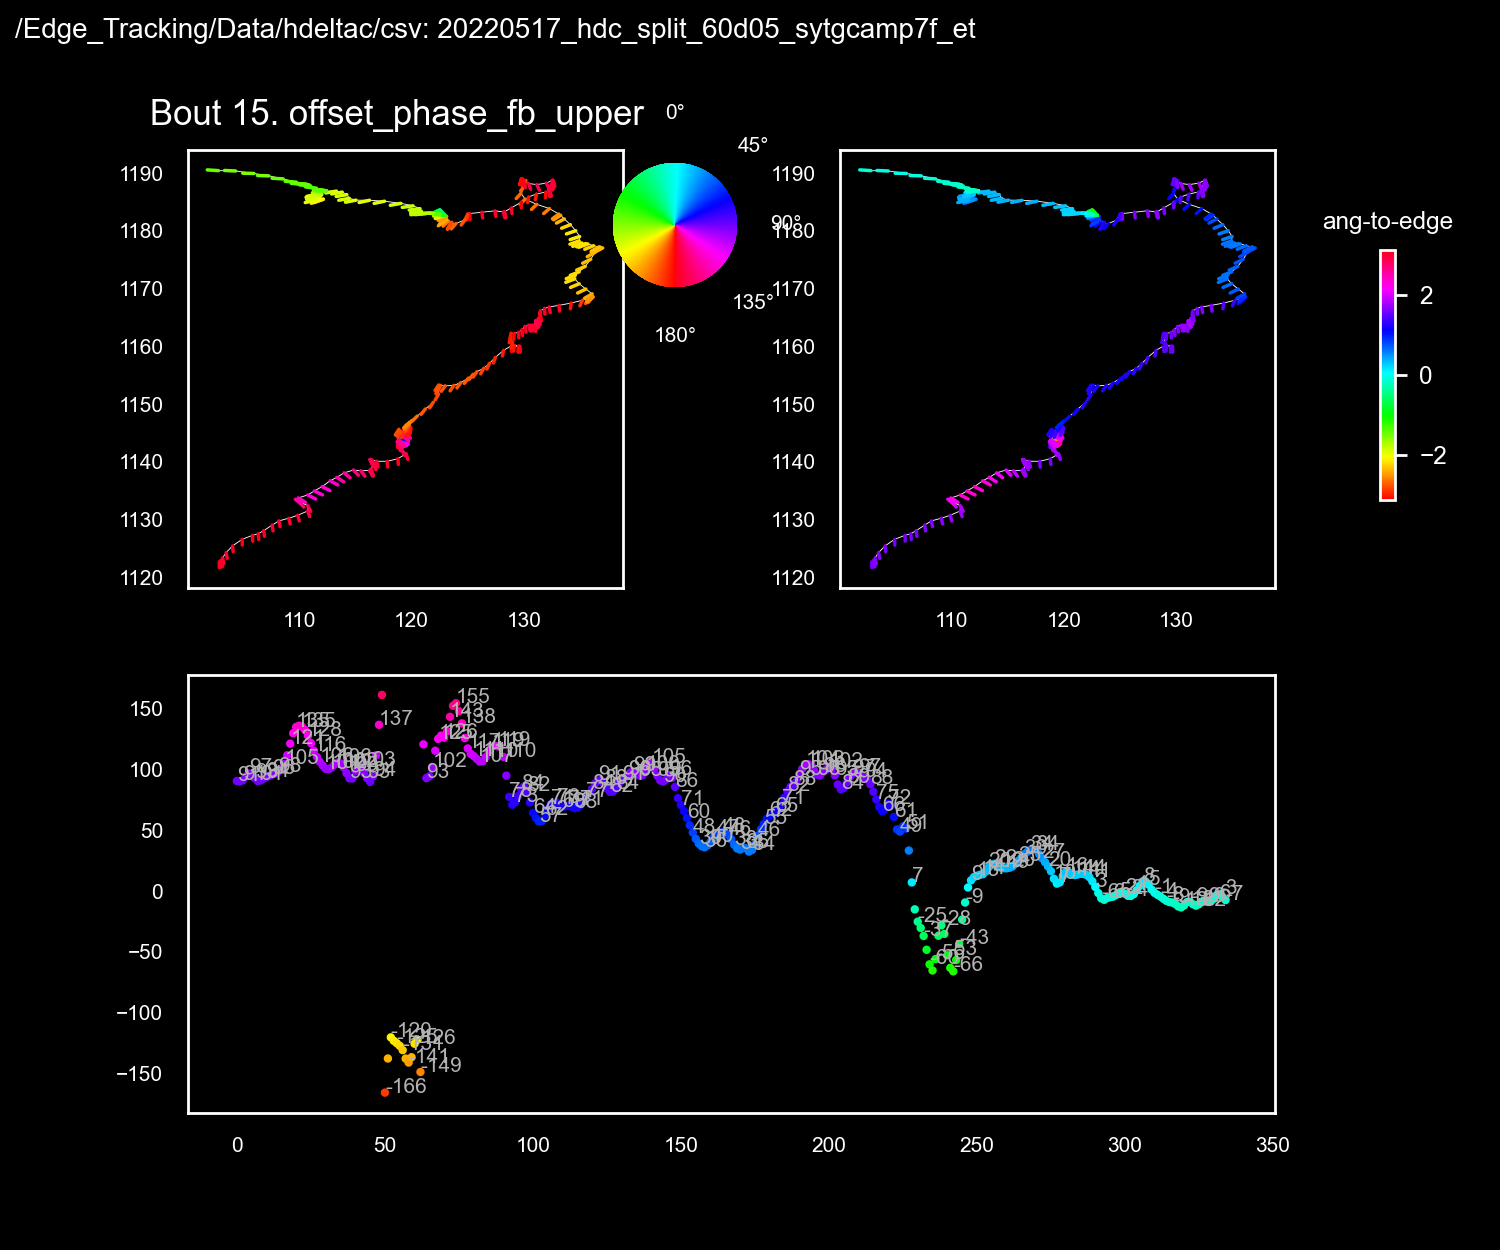

In [64]:
varname = 'offset_phase_fb_upper'
fig = pl.figure( figsize=(6,5))
gs = fig.add_gridspec(2, 2)
fig.text(0.1, 0.9, "Bout {}. {}".format(int(bnum), varname), fontsize=10)

# plot heading
ax=fig.add_subplot(gs[0, 0]) #xn[0]
norm_ = mpl.colors.Normalize(-np.pi, np.pi) #angbetween
cmap_ = mpl.cm.hsv
cols = [cmap_(norm_(c)) for c in b_[varname]]
ax = butil.overlay_angles_on_path(ax, b_, 
               varnames=[varname], colors=cols, scales=[1], alpha=1)    
util.add_colorwheel(fig, axes=[0.4, 0.77, 0.1, 0.1], )

# distance to edge
ax=fig.add_subplot(gs[0, 1]) #xn[0]
angbetween = b_['{}_to_edge'.format(varname)].values
norm_ = mpl.colors.TwoSlopeNorm(vcenter= vcenter, vmin=vmin, vmax=vmax)
cmap_ = pl.cm.hsv
cols = [cmap_(norm_(c)) for c in angbetween]
ax = butil.overlay_angles_on_path(ax, b_, 
               varnames=[varname], colors=cols, scales=[1], alpha=1)   
util.colorbar_from_mappable(ax, norm_, cmap_, hue_title='ang-to-edge', 
                            axes=[0.92, 0.6, 0.01, 0.2])
# plot values
ax=fig.add_subplot(gs[1,:])
ax.scatter(range(len(angbetween)), np.rad2deg(angbetween), c=cols, s=2)
for i, a in enumerate(b_['{}_to_edge_deg'.format(varname)]):
    if i % 2==0:
        ax.text(i, a, '{:.0f}'.format(a), color=[0.7]*3, fontsize=6)
    
pl.subplots_adjust(wspace=0.5, right=0.85)
util.label_figure(fig, '{}: {}'.format(fig_id, trial_id))


<IPython.core.display.Javascript object>


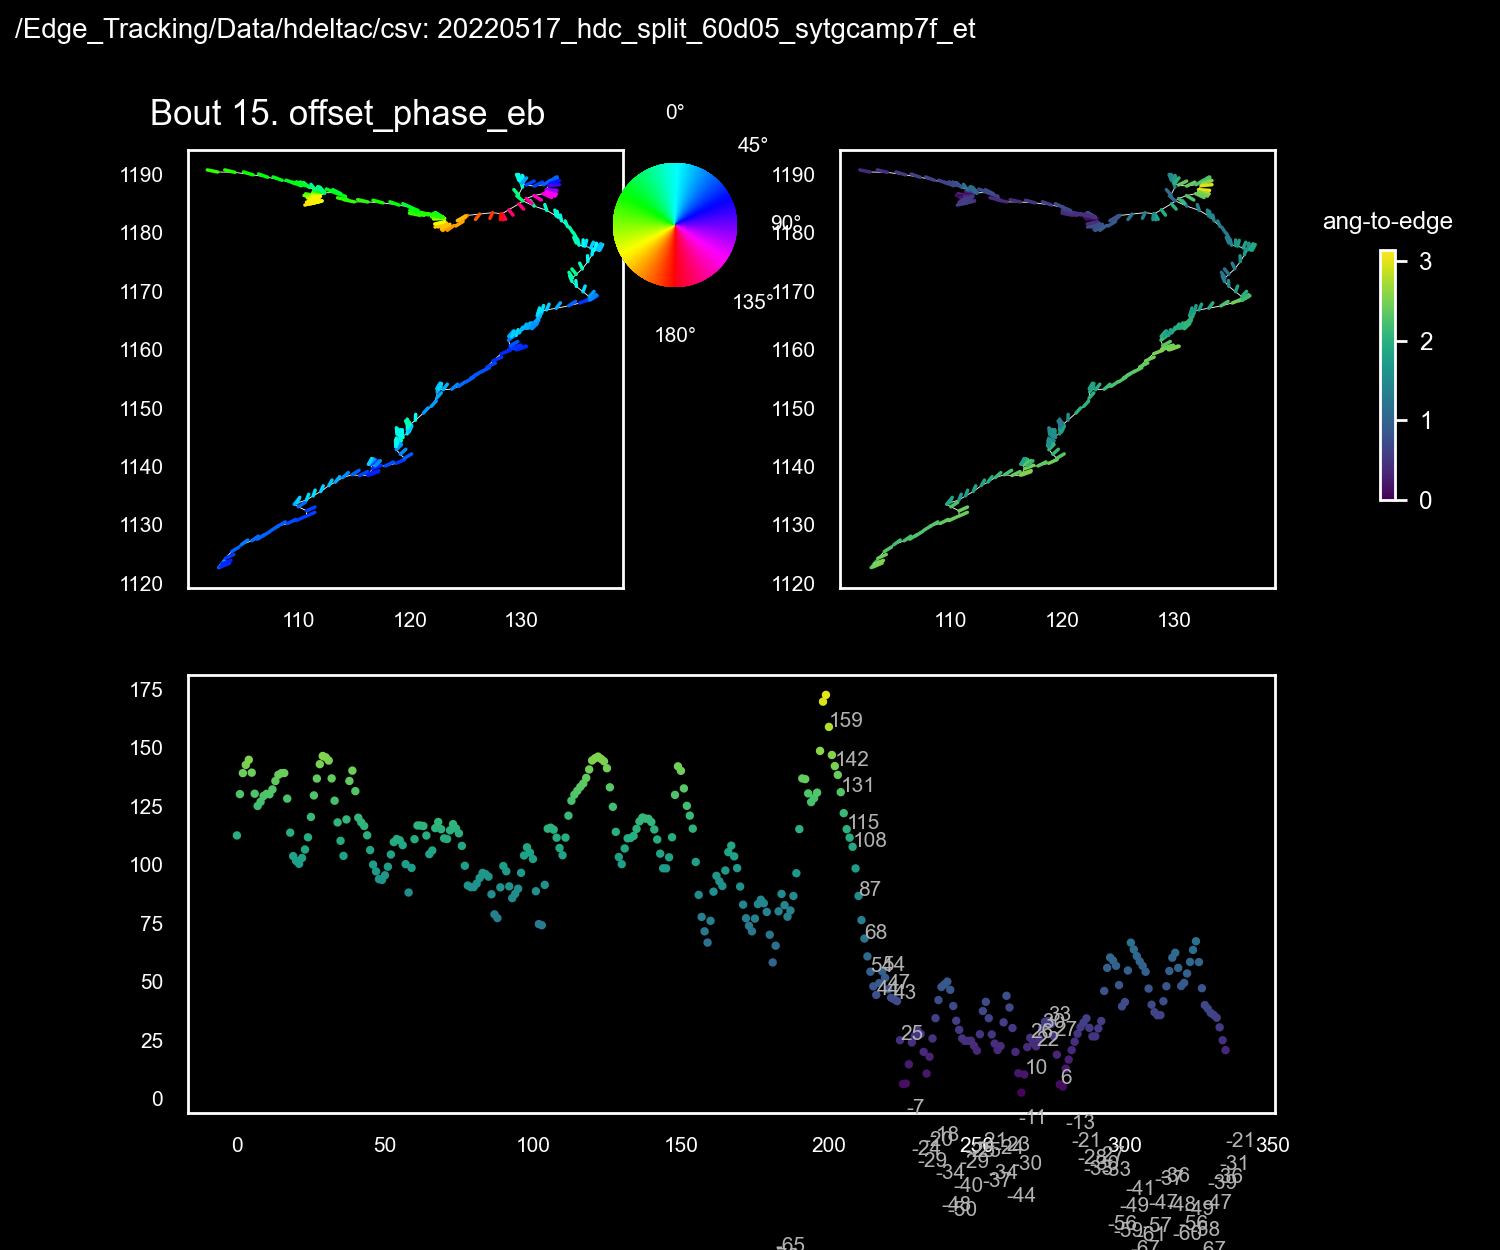

In [65]:
varname = 'offset_phase_eb'
fig = pl.figure( figsize=(6,5))
gs = fig.add_gridspec(2, 2)
fig.text(0.1, 0.9, "Bout {}. {}".format(int(bnum), varname), fontsize=10)

# plot heading
ax=fig.add_subplot(gs[0, 0]) #xn[0]
norm_ = mpl.colors.Normalize(-np.pi, np.pi) #angbetween
cmap_ = mpl.cm.hsv
cols = [cmap_(norm_(c)) for c in b_[varname]]
ax = butil.overlay_angles_on_path(ax, b_, 
               varnames=[varname], colors=cols, scales=[1], alpha=1)    
util.add_colorwheel(fig, axes=[0.4, 0.77, 0.1, 0.1], )

# distance to edge
ax=fig.add_subplot(gs[0, 1]) #xn[0]
angbetween = abs(b_['{}_to_edge'.format(varname)].values)
#norm_ = mpl.colors.TwoSlopeNorm(vcenter= vcenter, vmin=vmin, vmax=vmax)
norm_ = mpl.colors.TwoSlopeNorm(vcenter=np.pi/2, vmin=0, vmax=np.pi)
cmap_ = pl.cm.viridis
cols = [cmap_(norm_(c)) for c in angbetween]
ax = butil.overlay_angles_on_path(ax, b_, 
               varnames=[varname], colors=cols, scales=[1], alpha=1)   
util.colorbar_from_mappable(ax, norm_, cmap_, hue_title='ang-to-edge', 
                            axes=[0.92, 0.6, 0.01, 0.2])
# plot values
ax=fig.add_subplot(gs[1,:])
ax.scatter(range(len(angbetween)), np.rad2deg(angbetween), c=cols, s=2)
for i, a in enumerate(b_['{}_to_edge_deg'.format(varname)]):
    if i % 2==0:
        ax.text(i, a, '{:.0f}'.format(a), color=[0.7]*3, fontsize=6)
    
pl.subplots_adjust(wspace=0.5, right=0.85)
util.label_figure(fig, '{}: {}'.format(fig_id, trial_id))


<IPython.core.display.Javascript object>


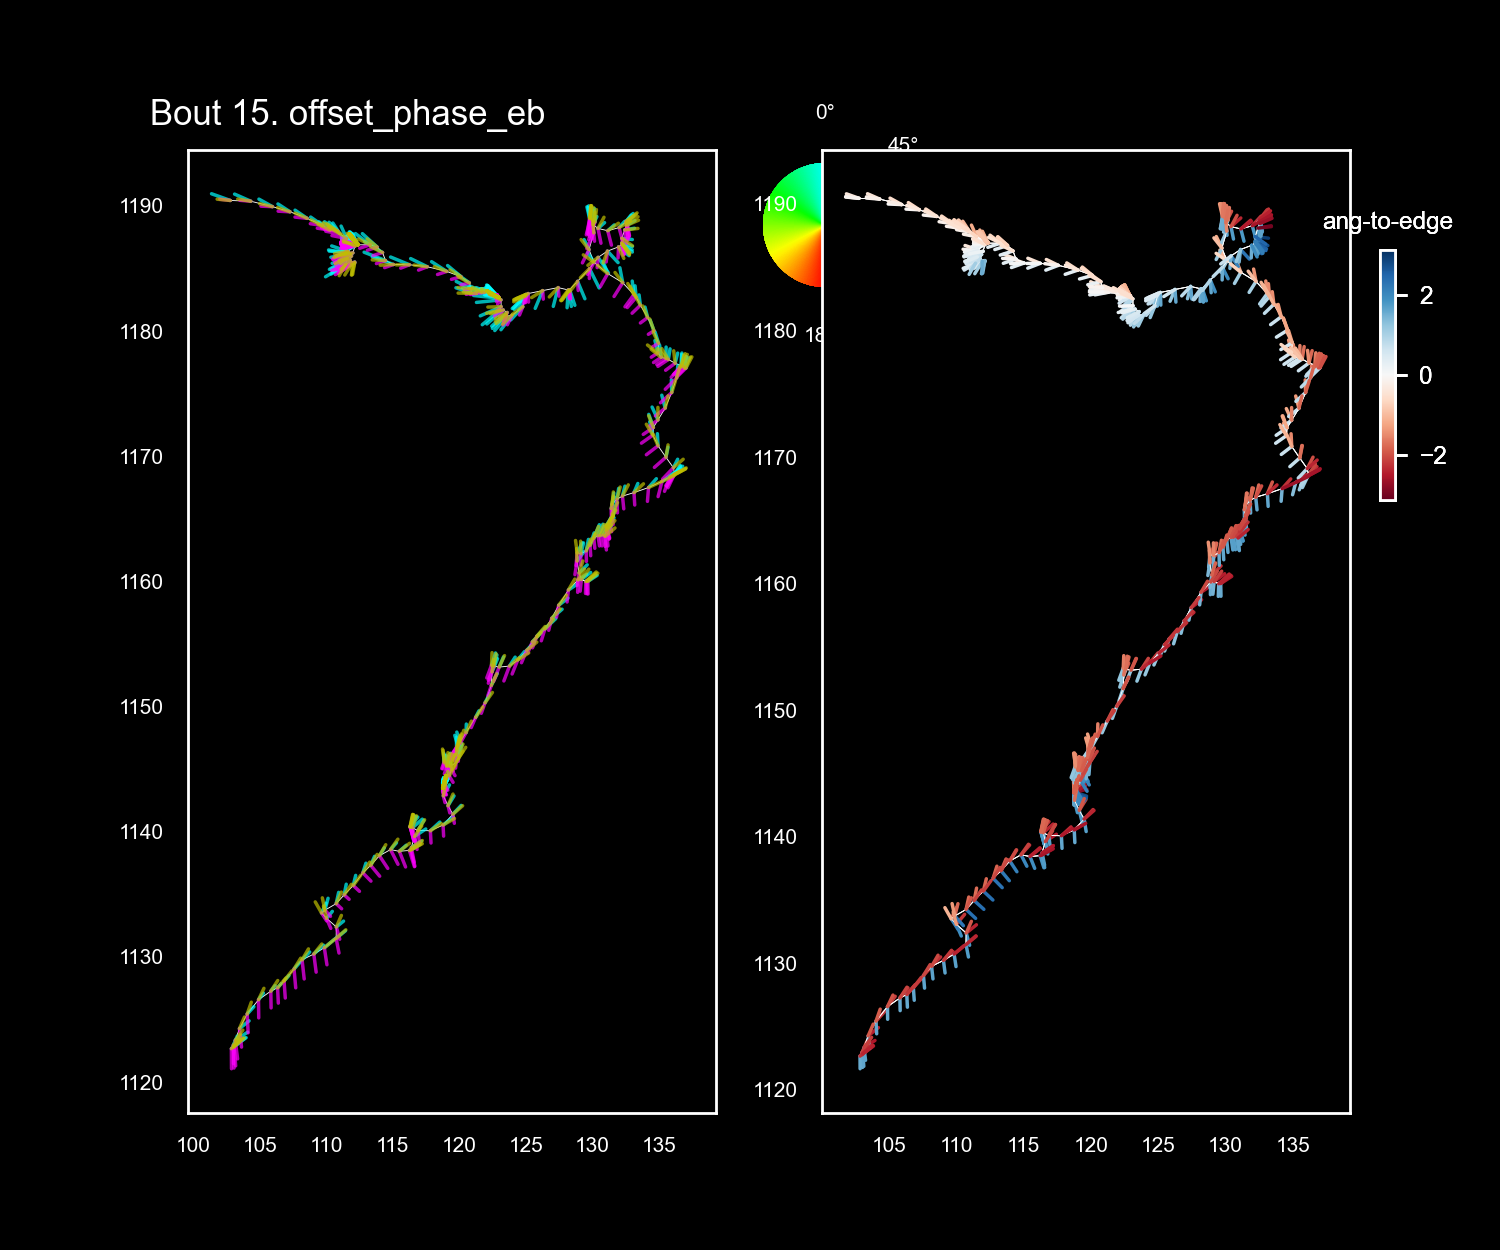

In [66]:
fig = pl.figure( figsize=(6,5))
gs = fig.add_gridspec(1, 2)
fig.text(0.1, 0.9, "Bout {}. {}".format(int(bnum), varname), fontsize=10)

# plot heading
ax=fig.add_subplot(gs[0, 0]) #xn[0]
varnames = ['offset_phase_eb', 'offset_phase_fb_upper', 'ft_heading']
colors=[heading_colors[v] for v in varnames]
scales=[heading_scales[v] for v in varnames]
labels=['EB', 'hDC-up', 'ft_heading']
ax = butil.overlay_angles_on_path(ax, b_,
                varnames=varnames, colors=colors, scales=scales)
util.add_colorwheel(fig, axes=[0.5, 0.77, 0.1, 0.1], )

# distance to edge
ax=fig.add_subplot(gs[0, 1]) #xn[0]
varnames = ['offset_phase_eb', 'offset_phase_fb_upper', 'ft_heading']
norm_ = mpl.colors.TwoSlopeNorm(vcenter= vcenter, vmin=vmin, vmax=vmax)
cmap_ = pl.cm.RdBu
for varname in varnames:
    cols = [cmap_(norm_(c)) for c in b_['{}_to_edge'.format(varname)]]
    ax = butil.overlay_angles_on_path(ax, b_, 
               varnames=[varname], colors=cols, scales=[1], alpha=1)   
    util.colorbar_from_mappable(ax, norm_, cmap_, hue_title='ang-to-edge', 
                            axes=[0.92, 0.6, 0.01, 0.2])

<IPython.core.display.Javascript object>


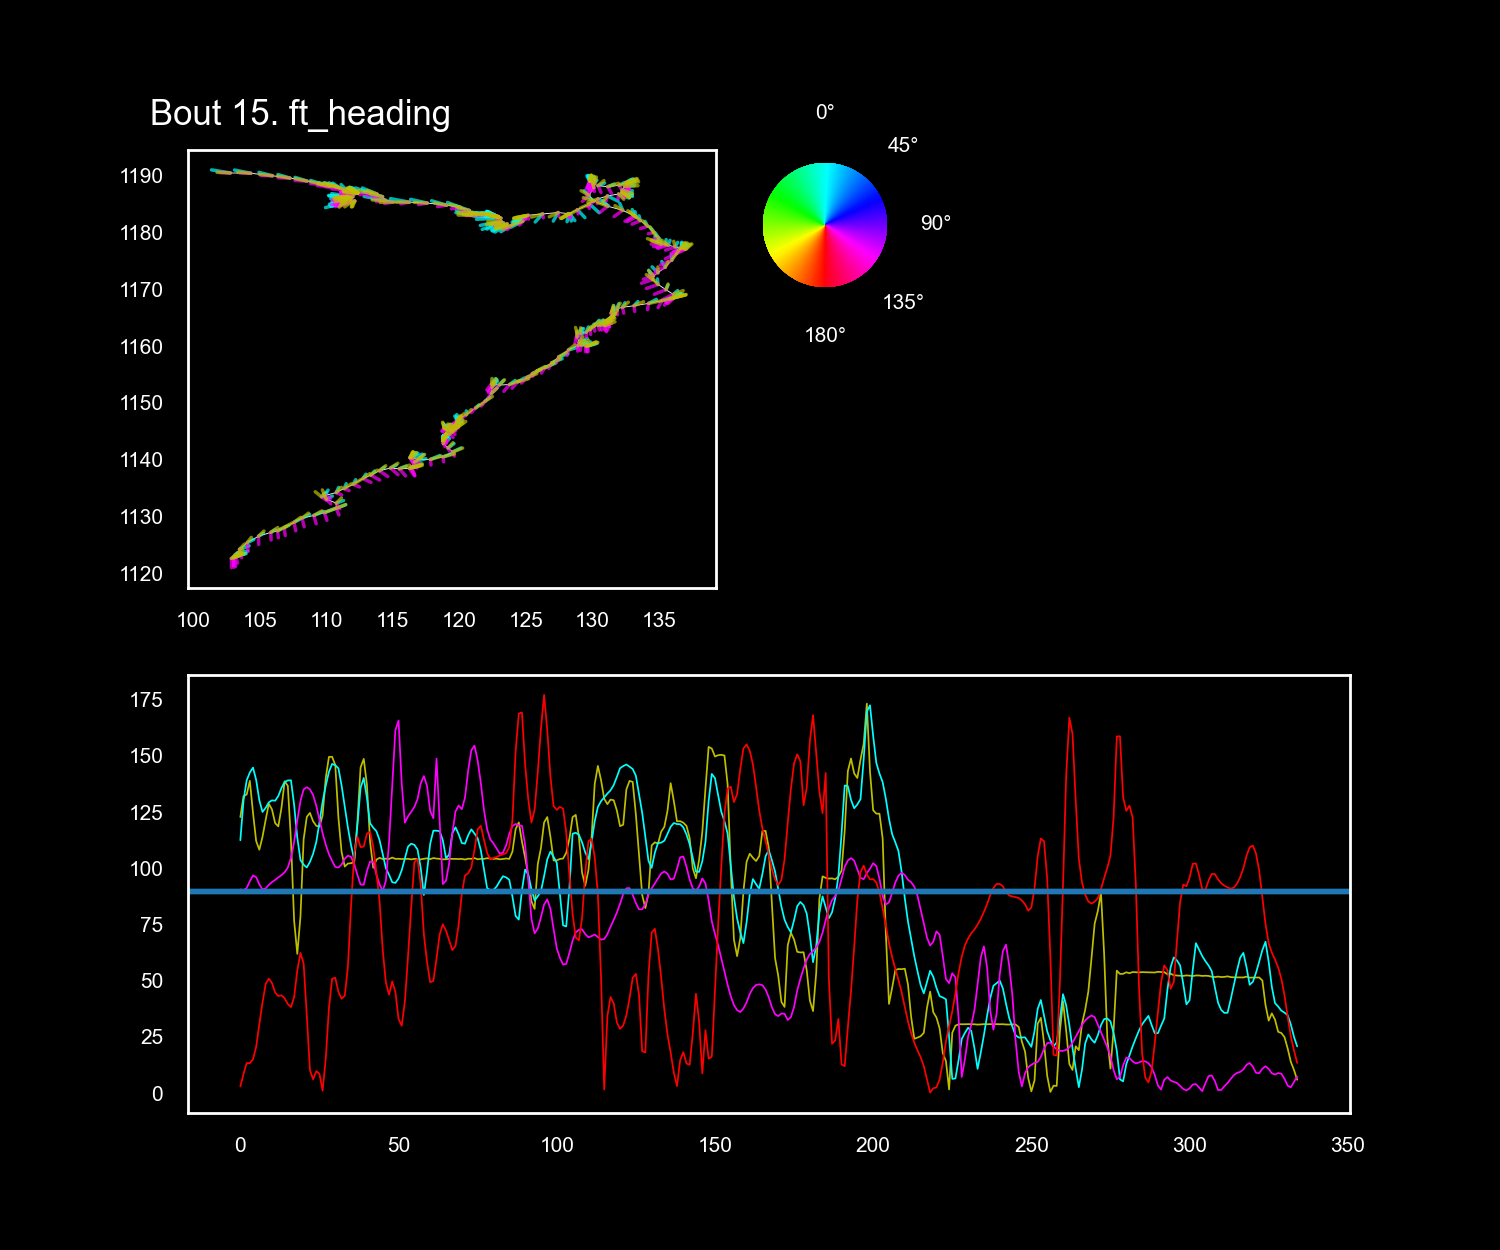

ft_heading
offset_phase_eb
offset_phase_fb_upper
offset_phase_fb_lower


In [67]:
fig = pl.figure( figsize=(6,5))
gs = fig.add_gridspec(2, 2)
fig.text(0.1, 0.9, "Bout {}. {}".format(int(bnum), varname), fontsize=10)

# plot heading
ax=fig.add_subplot(gs[0, 0]) #xn[0]
varnames = ['offset_phase_eb', 'offset_phase_fb_upper', 'ft_heading']
colors=[heading_colors[v] for v in varnames]
scales=[heading_scales[v] for v in varnames]
labels=['EB', 'hDC-up', 'ft_heading']
ax = butil.overlay_angles_on_path(ax, b_,nth=nth,
                varnames=varnames, colors=colors, scales=scales)
util.add_colorwheel(fig, axes=[0.5, 0.77, 0.1, 0.1], )

# distance to edge
ax=fig.add_subplot(gs[1,:]) #xn[0]
for varname in ['ft_heading', 'offset_phase_eb', 'offset_phase_fb_upper', 'offset_phase_fb_lower']:
    print(varname)
    angbetween = abs( b_['{}_to_edge_deg'.format(varname)].values)
    ax.plot(range(len(angbetween)), angbetween, lw=0.5, color=heading_colors[varname]) ##, c=cols, s=10) #, edgecolor='w')
    #ax.axhline(y=-90)
    ax.axhline(y=90)

<IPython.core.display.Javascript object>


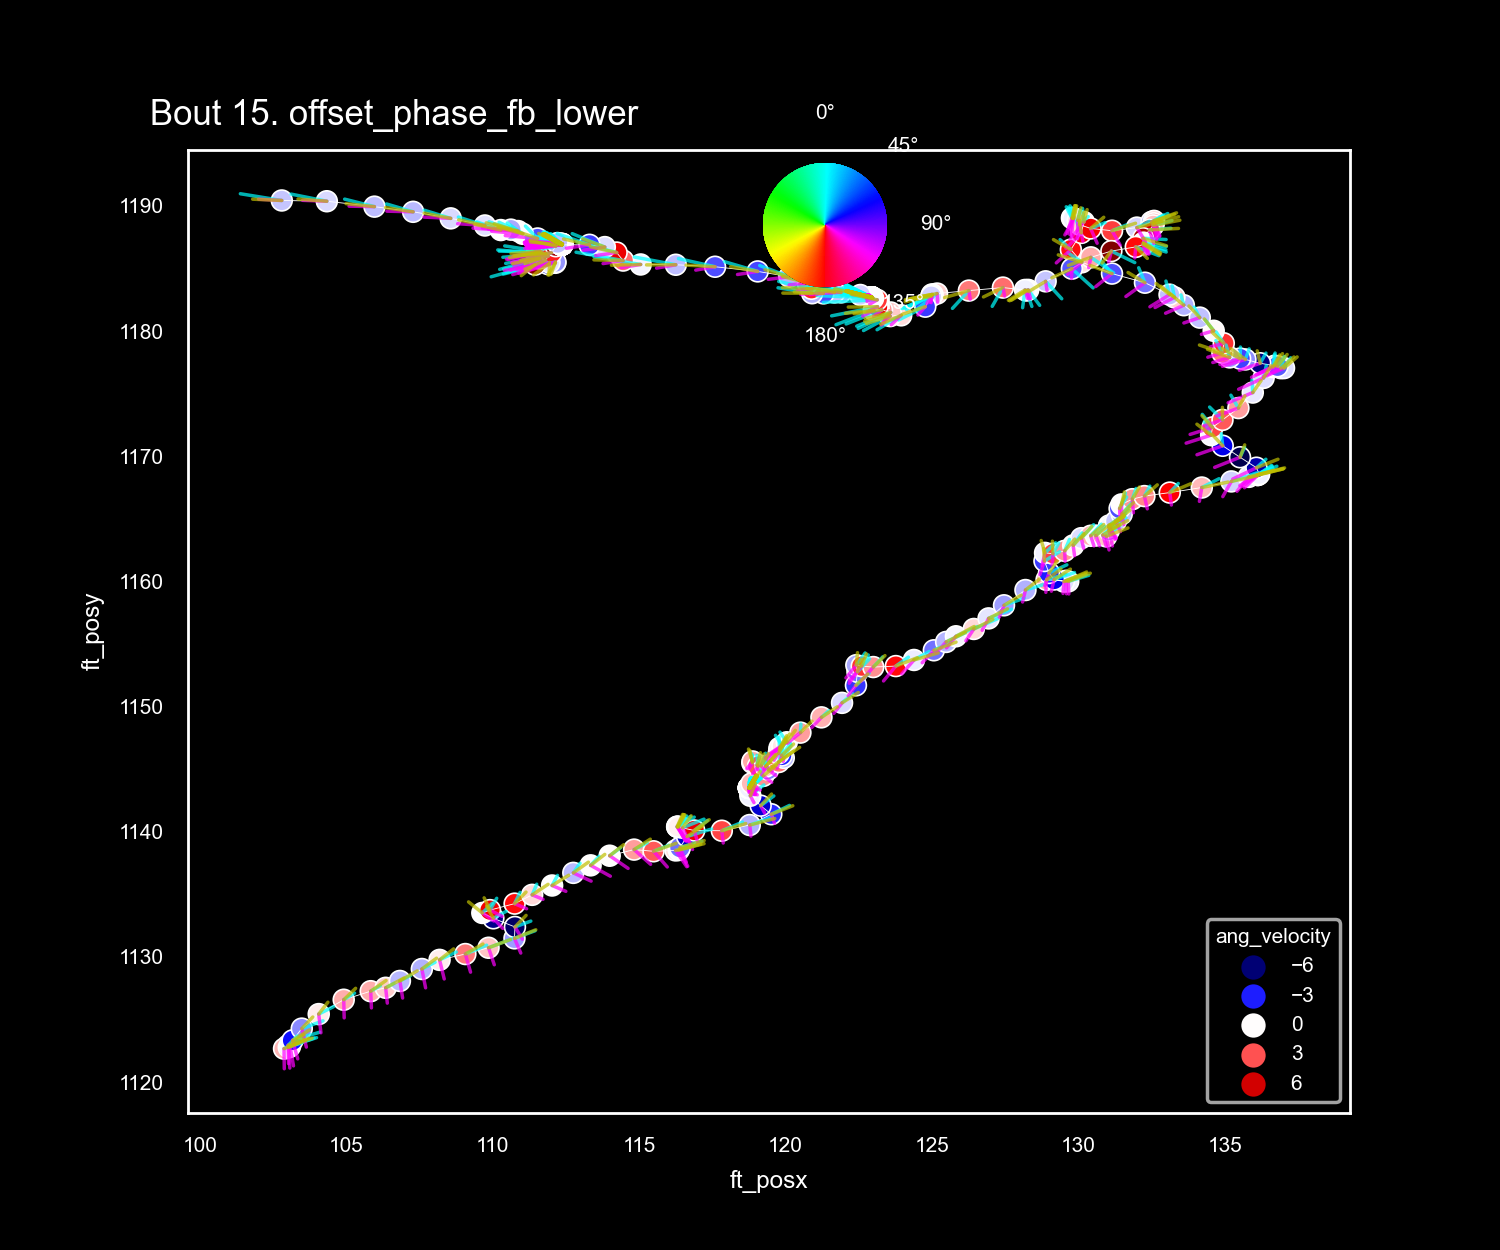

<PolarAxes: >

In [68]:
fig = pl.figure( figsize=(6,5))
gs = fig.add_gridspec(1,1)
fig.text(0.1, 0.9, "Bout {}. {}".format(int(bnum), varname), fontsize=10)

# plot heading
ax=fig.add_subplot(gs[0, 0]) #xn[0]
varnames = ['offset_phase_eb', 'offset_phase_fb_upper', 'ft_heading']
colors=[heading_colors[v] for v in varnames]
scales=[heading_scales[v] for v in varnames]
labels=['EB', 'hDC-up', 'ft_heading']
ax = butil.overlay_angles_on_path(ax, b_,nth=nth,
                varnames=varnames, colors=colors, scales=scales)

norm_ = mpl.colors.TwoSlopeNorm(vcenter= 0, 
                                vmin=b_['ang_velocity'].min(), vmax=b_['ang_velocity'].max())
cmap_ = pl.cm.seismic
sns.scatterplot(ax=ax, data=b_, x='ft_posx', y='ft_posy',
               hue='ang_velocity', palette=cmap_, hue_norm=norm_, alpha=1)
    
util.add_colorwheel(fig, axes=[0.5, 0.77, 0.1, 0.1], )

<IPython.core.display.Javascript object>


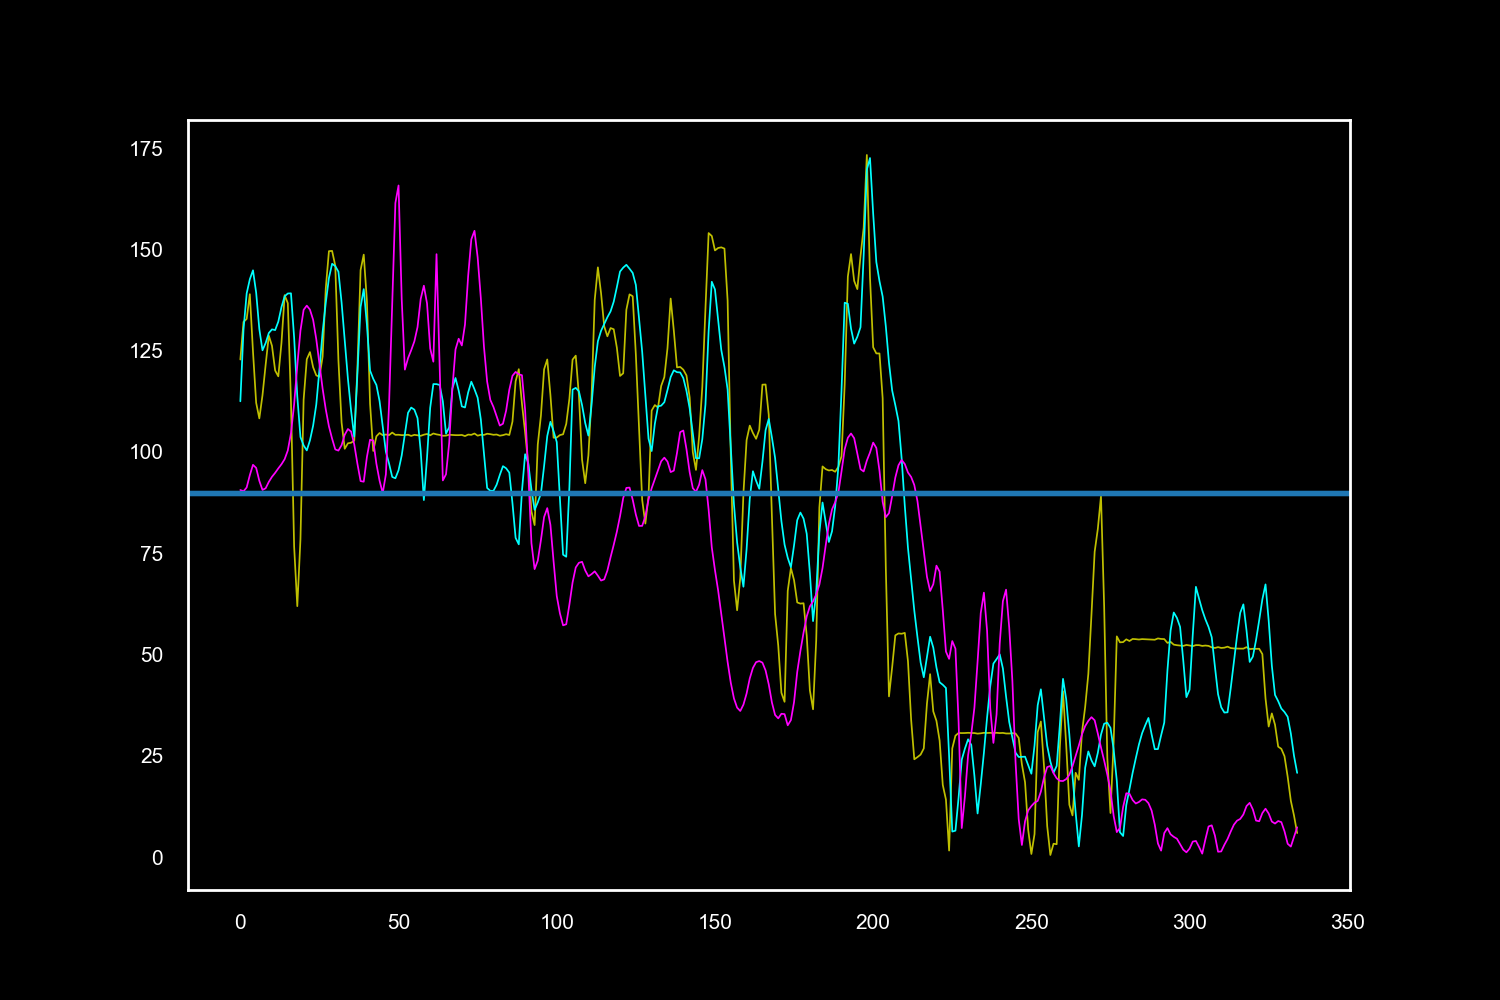

ft_heading
offset_phase_eb
offset_phase_fb_upper


In [69]:
fig, ax = pl.subplots()
#ax = butil.plot_trajectory(b_, ax=ax, hue_varname='ang_velocity', palette='seismic')

for varname in ['ft_heading', 'offset_phase_eb', 'offset_phase_fb_upper']: #, 'offset_phase_fb_lower']:
    print(varname)
    angbetween = abs( b_['{}_to_edge_deg'.format(varname)].values)
    if varname=='ft_heading':
        c = b_['ang_velocity'].values
        cmap='seismic'
    else:
        c=heading_colors[varname]
        cmap=None
#     ax.scatter(range(len(angbetween)), angbetween, cmap=cmap,
#                c=c, s=10) #, edgecolor='w')
    ax.plot(range(len(angbetween)), angbetween, lw=0.5, color=heading_colors[varname]) ##, c=cols, s=10) #, edgecolor='w')
    #ax.axhline(y=-90)
    ax.axhline(y=90)

<IPython.core.display.Javascript object>


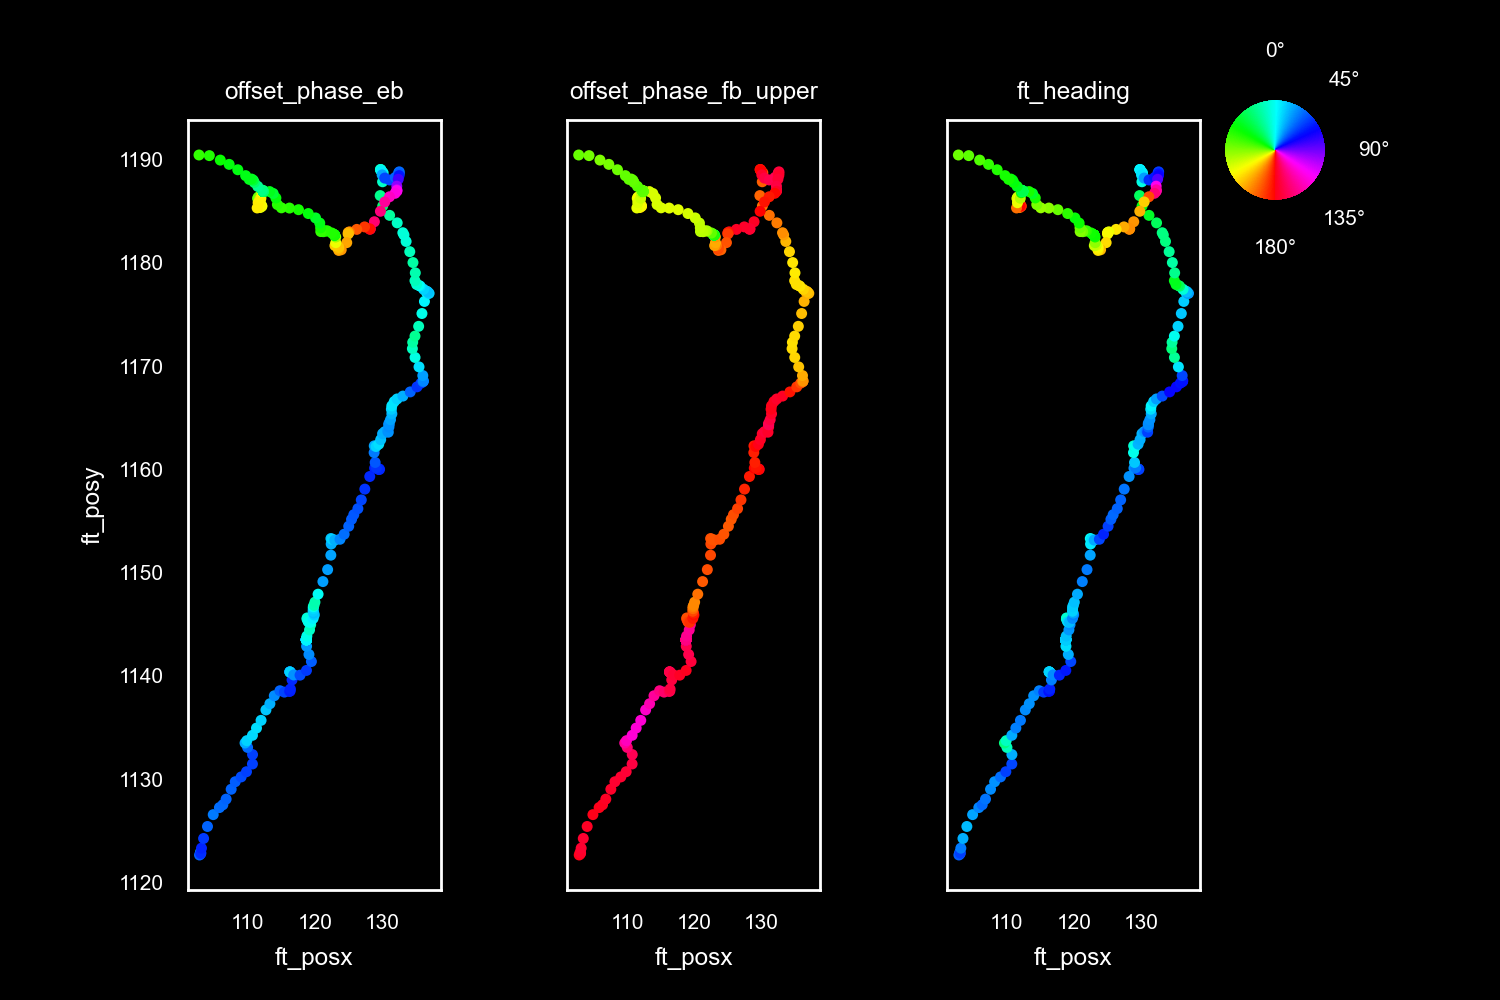

-3.141226257833939

In [71]:
bnum = 15
b_ = df[df['boutnum']==bnum].copy()

hue_norm = mpl.colors.Normalize(vmin=-np.pi, vmax=np.pi)
fig, axn = pl.subplots(1, 3, sharex=True, sharey=True)
for ax, varname in zip(axn.flat, varnames):
    sns.scatterplot(data=b_, ax=ax, x='ft_posx', y='ft_posy',
                    hue=varname, palette='hsv', hue_norm=hue_norm, 
                    s=10, edgecolor='none', legend=False)
    ax.set_title(varname)
pl.subplots_adjust(wspace=0.5, right=0.8)
util.add_colorwheel(fig)
b_['offset_phase_fb_upper'].min()

<IPython.core.display.Javascript object>


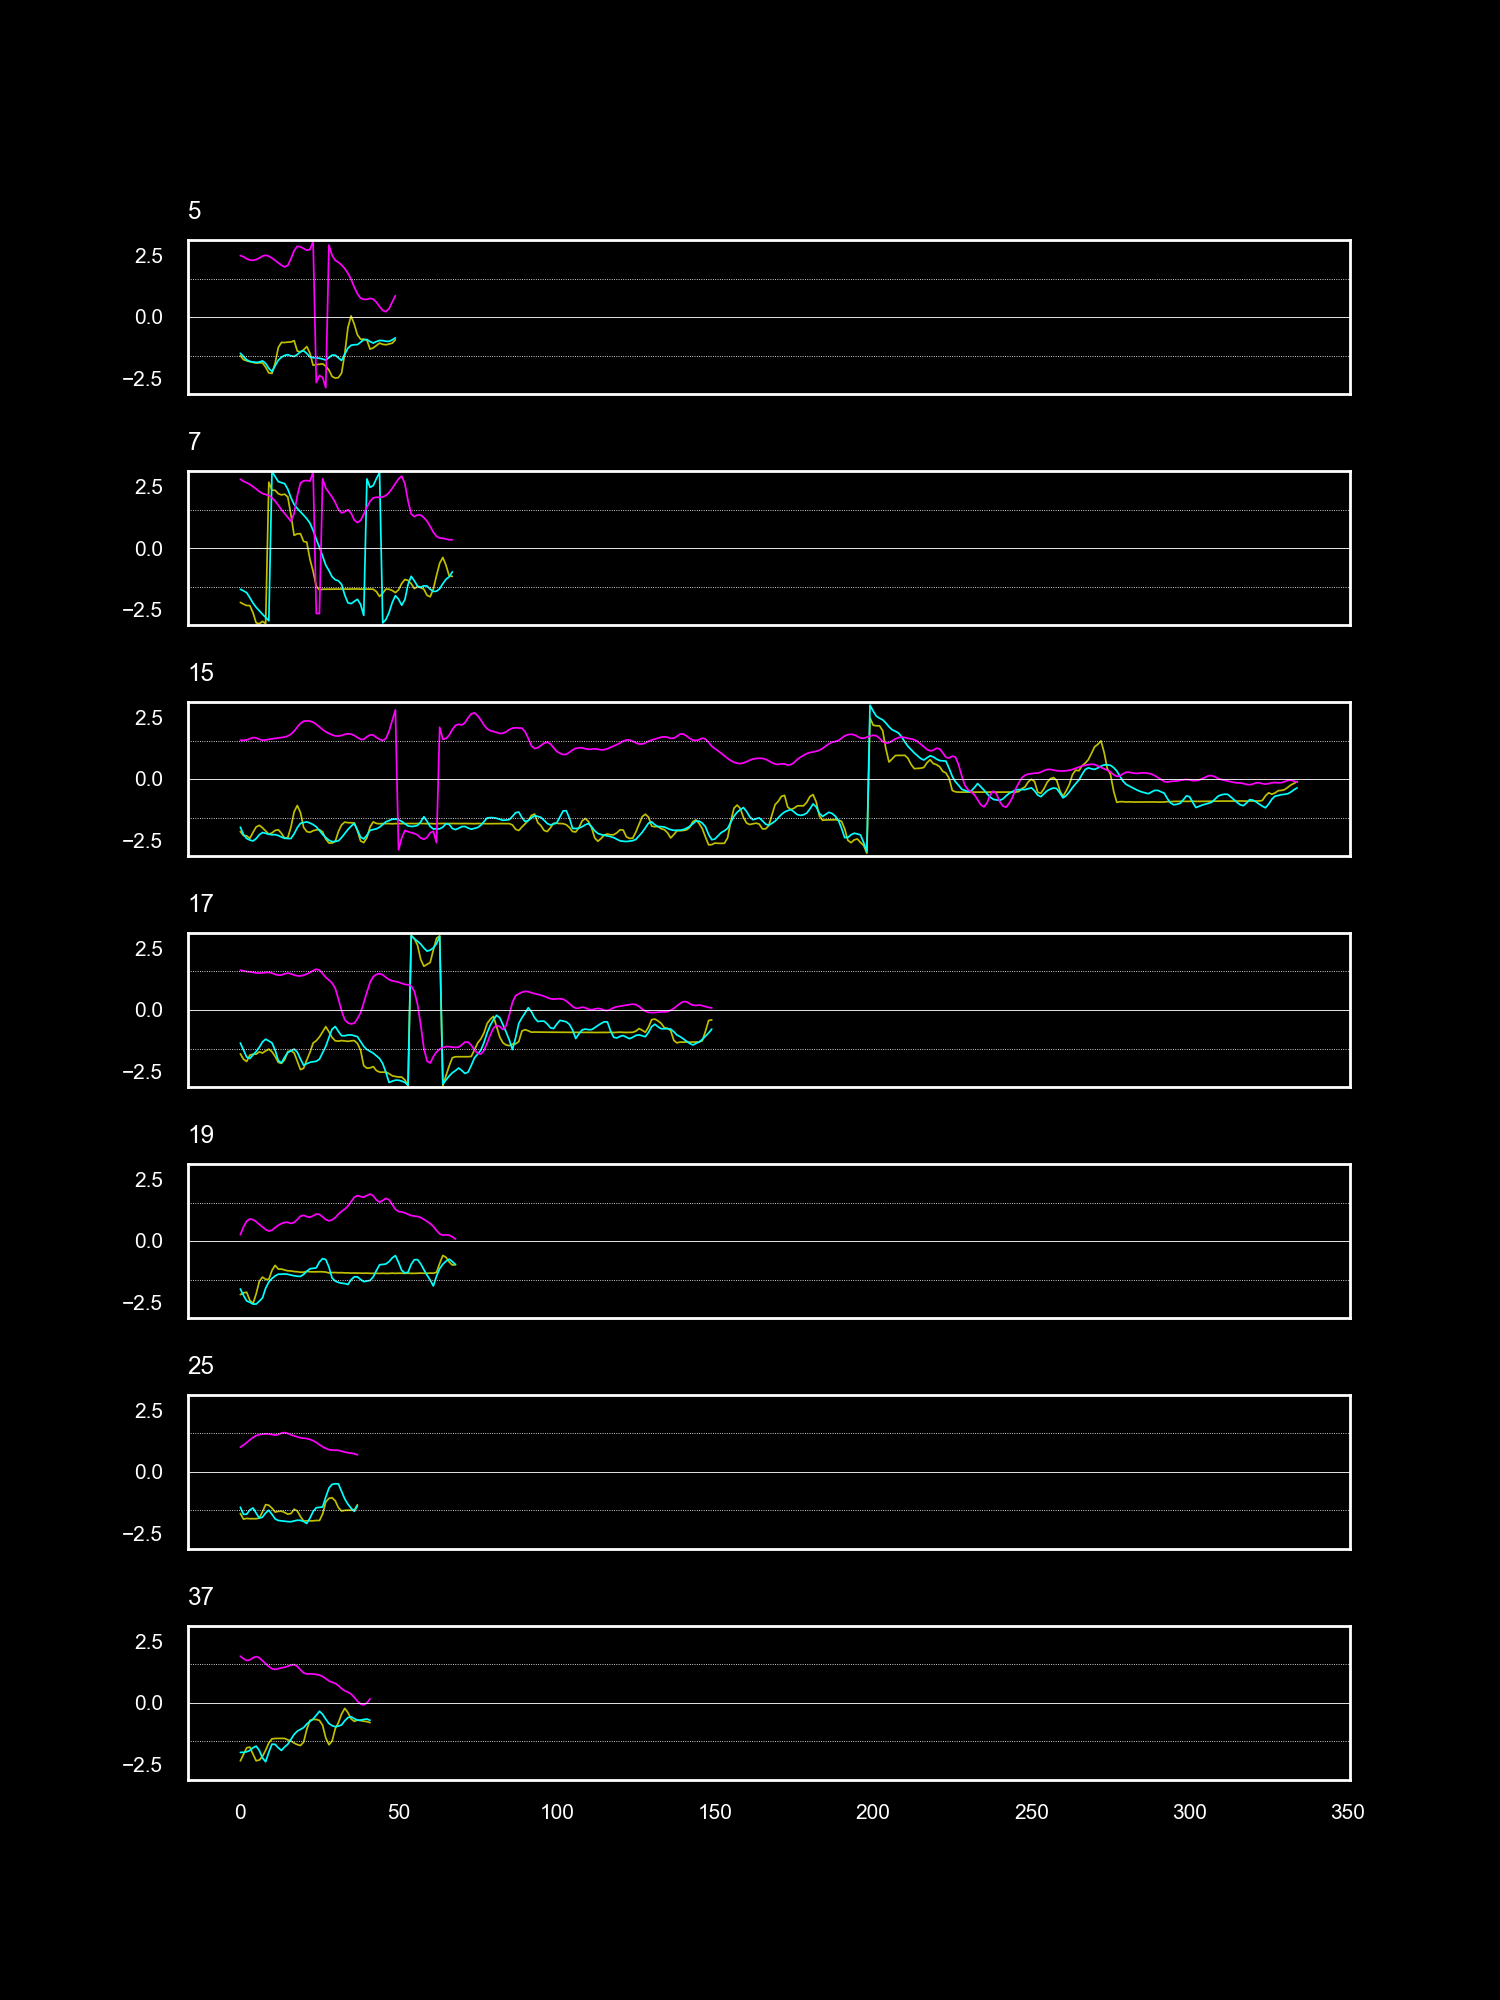

In [72]:
varnames = ['ft_heading', 'offset_phase_eb', 'offset_phase_fb_upper']
boutnums = [5, 7, 15, 17, 19, 25, 37]
fig, axn = pl.subplots(len(boutnums), 1, figsize=(6,8), sharex=True, sharey=True)
for ax, bnum in zip(axn.flat, boutnums):
    b_ = df[df['boutnum']==bnum].copy()
    for varname in varnames:
        ang_ = b_['{}_to_edge'.format(varname)]
        ax.plot(range(len(ang_)), ang_, lw=0.5, color=heading_colors[varname]) ##, c=cols, s=10) #, edgecolor='w')
    ax.axhline(y=0, color='w', lw=0.25)
    ax.axhline(y=np.pi/2, color='w', lw=0.25, linestyle=':')
    ax.axhline(y=-np.pi/2, color='w', lw=0.25, linestyle=':')
    ax.set_ylim([-np.pi, np.pi])
    ax.set_title(bnum, loc='left')
    #ax.set_aspect(5)
pl.subplots_adjust(hspace=0.5)

In [402]:
trial_id

'20220517_hdc_split_60d05_sytgcamp7f_et'

In [404]:
df.columns

Index(['ft_posx', 'ft_posy', 'time', 'instrip', 'Unnamed: 0', 'x', 'y',
       'seconds', 'heading', 'offset_phase_eb', 'offset_phase_fb_upper',
       'offset_phase_fb_lower', 'fitted_amplitude_eb',
       'fitted_amplitude_fb_upper', 'fitted_amplitude_fb_lower',
       'fitted_baseline_eb', 'fitted_baseline_fb_upper',
       'fitted_baseline_fb_lower', 'wedges_eb', 'wedges_fb_upper',
       'wedges_fb_lower', 'condition', 'fly_id', 'trial_id', 'boutnum',
       'flipped', 'heading_og', 'ang_velocity', 'del_rot_error',
       'delta_timestep', 'df_pitch', 'df_roll', 'df_yaw', 'frame',
       'ft_heading', 'ft_movement_dir', 'ft_speed', 'led1_stpt', 'led2_stpt',
       'mfc1_stpt', 'mfc2_stpt', 'mfc3_stpt', 'motor_heading',
       'motor_step_command', 'net_motion', 'offset_eb_phase',
       'offset_fb_phase_lower', 'offset_fb_phase_upper', 'seconds_x',
       'sequence_counter', 'sig_status', 'timestamp', 'x_velocity',
       'y_velocity', 'rdp_ft_posx', 'rdp_ft_posy', 'rel_time', 'cu

In [73]:
len(long_bouts)

24

In [ ]:
len(long_bouts)

In [74]:
compare_vars = ['ft_heading', 'offset_phase_eb', 'offset_phase_fb_upper',\
               'ft_heading_to_edge', 'offset_phase_eb_to_edge', \
                'offset_phase_fb_upper_to_edge', 'ang_velocity']
plotdf = df[df['boutnum'].isin(long_bouts)].copy()
sns.pairplot(plotdf, 
             hue='instrip', palette={False: 'w', True: 'r'},
             plot_kws={'alpha': 0.5},
             diag_kind='hist', diag_kws={'common_norm': False, 'kde': True, 'stat': 'probability'})
 
pl.savefig(os.path.join(figdir, 'pairplot_fly-avgs.png'), edgecolor='none')
print(figdir)

<IPython.core.display.Javascript object>

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


LinAlgError: singular matrix